In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
db = pd.read_csv("bank_client_information.csv", sep=";")

# Part 1
## Data research. 
### This task presents data on bank customers who have a loan. The data consists of 43 significant variables that will be used in further work with the data. The data types and the corresponding column filling are presented below in the data information ( db.info () )

In [3]:
db.head()

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,12,1000012,Форма банка (без печати работодателя),Ремонт,1.0,0.59,мужской,0,0,среднее-специальное,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,1000032,2НДФЛ,Ремонт,1.0,0.55,мужской,0,0,высшее,...,0.0,7.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,1000052,2НДФЛ,Ремонт,1.0,0.23,женский,1,0,Высшее/Второе высшее/Ученая степень,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,1000072,Свободная форма с печатью работодателя,Покупка земли,0.0,0.32,мужской,0,0,второе высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,1000092,Поступление зарплаты на счет,Ремонт,0.0,0.31,мужской,2,0,высшее,...,1.0,13.0,91.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Номер варианта         10242 non-null  int64  
 1   ID                     10242 non-null  int64  
 2   INCOME_BASE_TYPE       10161 non-null  object 
 3   CREDIT_PURPOSE         10242 non-null  object 
 4   INSURANCE_FLAG         10241 non-null  float64
 5   DTI                    10102 non-null  float64
 6   SEX                    10242 non-null  object 
 7   FULL_AGE_CHILD_NUMBER  10242 non-null  int64  
 8   DEPENDANT_NUMBER       10242 non-null  int64  
 9   EDUCATION              10242 non-null  object 
 10  EMPL_TYPE              10230 non-null  object 
 11  EMPL_SIZE              10104 non-null  object 
 12  BANKACCOUNT_FLAG       8008 non-null   float64
 13  Period_at_work         8008 non-null   float64
 14  age                    8008 non-null   float64
 15  EM

In [5]:
db['EDUCATION'].unique()

array(['среднее-специальное', 'высшее',
       'Высшее/Второе высшее/Ученая степень', 'второе высшее',
       'незаконченное высшее', 'среднее', '*n.a.*', 'ученая степень',
       'Неполное среднее'], dtype=object)

### Based on the output information, we see different types of data stored in each column, where:
#### - int/float ( show that the stored variables are numerical) 
#### - object  (is responsible for string variables) 
###  We see that despite the fact that there are no zero values in the data columns from 0 to 14 and the number of rows exceeds 8000, the remaining columns are mostly not filled. 
### That is why I decided to greatly shorten our initial dataframe in order to avoid a large number of unfilled cells, which, when filled with average values, can affect the accuracy of the conclusions.

### Data cleaning

In [6]:
db.describe(include = 'all')

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
count,10242.0,1.024200e+04,10161,10242,10241.000000,10102.000000,10242,10242.000000,10242.000000,10242,...,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000
unique,NaN,NaN,5,10,NaN,NaN,2,NaN,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2НДФЛ,Ремонт,NaN,NaN,мужской,NaN,NaN,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3358,5747,NaN,NaN,5768,NaN,NaN,5810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12.0,1.102422e+06,NaN,NaN,0.601406,0.384324,NaN,0.550869,0.004394,NaN,...,0.723381,14.082363,61.490924,0.585207,0.146031,0.084801,0.067190,0.033866,0.017069,0.017610
std,0.0,5.913510e+04,NaN,NaN,0.489633,0.137268,NaN,0.765683,0.080765,NaN,...,1.063381,15.448796,30.197832,0.492753,0.353185,0.278623,0.250385,0.180909,0.129544,0.131548
min,12.0,1.000012e+06,NaN,NaN,0.000000,0.020000,NaN,0.000000,0.000000,NaN,...,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.0,1.051217e+06,NaN,NaN,0.000000,0.280000,NaN,0.000000,0.000000,NaN,...,0.000000,4.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.0,1.102422e+06,NaN,NaN,1.000000,0.400000,NaN,0.000000,0.000000,NaN,...,0.000000,9.000000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.0,1.153627e+06,NaN,NaN,1.000000,0.490000,NaN,1.000000,0.000000,NaN,...,1.000000,18.000000,87.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
db = db.drop(db.columns[0], axis=1)
db_clear = db.dropna()
dbc = db_clear

In [8]:
dbc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 1 to 10241
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3677 non-null   int64  
 1   INCOME_BASE_TYPE       3677 non-null   object 
 2   CREDIT_PURPOSE         3677 non-null   object 
 3   INSURANCE_FLAG         3677 non-null   float64
 4   DTI                    3677 non-null   float64
 5   SEX                    3677 non-null   object 
 6   FULL_AGE_CHILD_NUMBER  3677 non-null   int64  
 7   DEPENDANT_NUMBER       3677 non-null   int64  
 8   EDUCATION              3677 non-null   object 
 9   EMPL_TYPE              3677 non-null   object 
 10  EMPL_SIZE              3677 non-null   object 
 11  BANKACCOUNT_FLAG       3677 non-null   float64
 12  Period_at_work         3677 non-null   float64
 13  age                    3677 non-null   float64
 14  EMPL_PROPERTY          3677 non-null   object 
 15  EMP

In [9]:
dbc.reset_index(drop=True)

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000032,2НДФЛ,Ремонт,1.0,0.55,мужской,0,0,высшее,специалист,...,0.0,7.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000092,Поступление зарплаты на счет,Ремонт,0.0,0.31,мужской,2,0,высшее,специалист,...,1.0,13.0,91.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000112,Форма банка (без печати работодателя),Покупка автомобиля,0.0,0.22,мужской,1,0,второе высшее,менеджер среднего звена,...,1.0,19.0,98.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1000172,2НДФЛ,Покупка недвижимости/ строительство,0.0,0.42,мужской,0,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,...,1.0,12.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000212,Поступление зарплаты на счет,Ремонт,0.0,0.25,мужской,0,0,высшее,специалист,...,1.0,33.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,1204692,Форма банка (без печати работодателя),Ремонт,0.0,0.49,женский,0,0,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,...,2.0,13.0,103.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3673,1204712,2НДФЛ,Ремонт,1.0,0.39,мужской,0,0,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,...,0.0,1.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3674,1204752,Поступление зарплаты на счет,Другое,0.0,0.41,мужской,0,0,Высшее/Второе высшее/Ученая степень,специалист,...,0.0,21.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3675,1204772,Поступление зарплаты на счет,Ремонт,1.0,0.56,мужской,0,0,Высшее/Второе высшее/Ученая степень,специалист,...,0.0,6.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Next, we clean up the data from empty values by deleting the corresponding rows, and change the indexes from the initial one to avoid gaps in the indexing of rows.

In [10]:
dbc.columns

Index(['ID', 'INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'DTI',
       'SEX', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'EDUCATION',
       'EMPL_TYPE', 'EMPL_SIZE', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age',
       'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS', 'max90days', 'max60days',
       'max30days', 'max21days', 'max14days', 'avg_num_delay', 'if_zalog',
       'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60',
       'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed',
       'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed',
       'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist',
       'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year',
       'thirty_vintage', 'sixty_vintage', 'ninety_vintage'],
      dtype='object')

## Initial data visualization to view the filling of various columns and the frequency of parameters encountered.

### Income base type

In [11]:
dbc['INCOME_BASE_TYPE'].value_counts()

Поступление зарплаты на счет              1280
Форма банка (без печати работодателя)     1054
2НДФЛ                                      960
Свободная форма с печатью работодателя     382
3НДФЛ                                        1
Name: INCOME_BASE_TYPE, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2НДФЛ'),
  Text(1, 0, 'Поступление зарплаты на счет'),
  Text(2, 0, 'Форма банка (без печати работодателя)'),
  Text(3, 0, 'Свободная форма с печатью работодателя'),
  Text(4, 0, '3НДФЛ')])

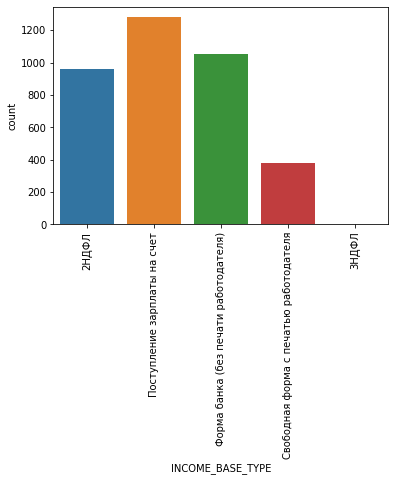

In [12]:
sns.countplot(x = dbc["INCOME_BASE_TYPE"], )
plt.xticks(rotation=90)

### Credit purpose 

In [13]:
dbc['CREDIT_PURPOSE'].value_counts()

Ремонт                                 2145
Покупка автомобиля                      562
Покупка недвижимости/ строительство     441
Отпуск                                  151
Другое                                  106
Покупка мебели                           80
Покупка бытовой техники                  66
Обучение                                 48
Лечение                                  44
Покупка земли                            34
Name: CREDIT_PURPOSE, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ремонт'),
  Text(1, 0, 'Покупка автомобиля'),
  Text(2, 0, 'Покупка недвижимости/ строительство'),
  Text(3, 0, 'Другое'),
  Text(4, 0, 'Отпуск'),
  Text(5, 0, 'Покупка мебели'),
  Text(6, 0, 'Покупка бытовой техники'),
  Text(7, 0, 'Обучение'),
  Text(8, 0, 'Покупка земли'),
  Text(9, 0, 'Лечение')])

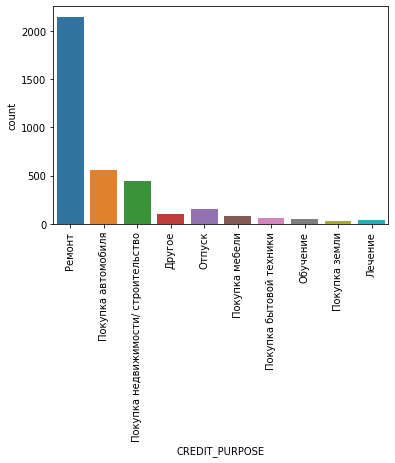

In [14]:
sns.countplot(x = dbc["CREDIT_PURPOSE"], )
plt.xticks(rotation=90)

### Sex

In [15]:
dbc['SEX'].value_counts()

мужской    1895
женский    1782
Name: SEX, dtype: int64

<AxesSubplot: xlabel='SEX', ylabel='count'>

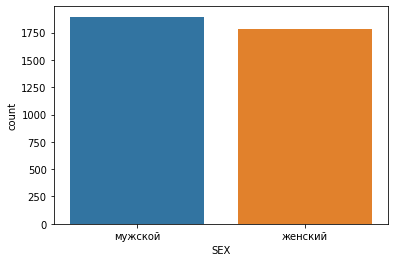

In [16]:
sns.countplot(x = dbc["SEX"], )


### Number of full age children

In [17]:
dbc['FULL_AGE_CHILD_NUMBER'].value_counts()

0    2229
1     991
2     389
3      59
4       8
5       1
Name: FULL_AGE_CHILD_NUMBER, dtype: int64

<AxesSubplot: xlabel='FULL_AGE_CHILD_NUMBER', ylabel='count'>

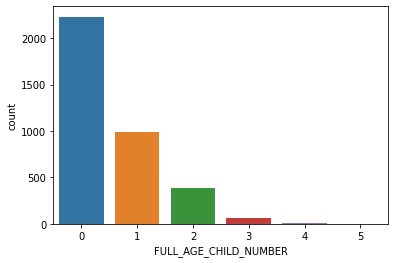

In [18]:
sns.countplot(x = dbc["FULL_AGE_CHILD_NUMBER"], )

### Education level

In [19]:
dbc['EDUCATION'].value_counts()

высшее                                 2086
Высшее/Второе высшее/Ученая степень     624
среднее-специальное                     553
среднее                                 151
незаконченное высшее                    127
второе высшее                           114
*n.a.*                                   14
ученая степень                            6
Неполное среднее                          2
Name: EDUCATION, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'высшее'),
  Text(1, 0, 'второе высшее'),
  Text(2, 0, 'Высшее/Второе высшее/Ученая степень'),
  Text(3, 0, 'среднее-специальное'),
  Text(4, 0, 'незаконченное высшее'),
  Text(5, 0, 'среднее'),
  Text(6, 0, '*n.a.*'),
  Text(7, 0, 'Неполное среднее'),
  Text(8, 0, 'ученая степень')])

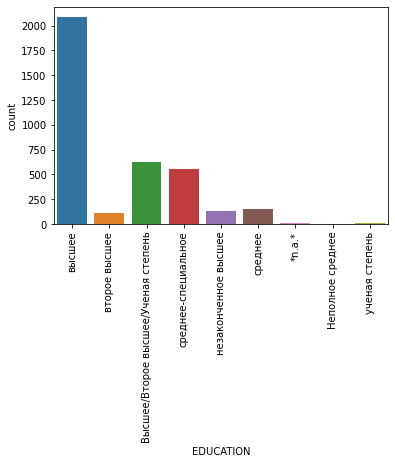

In [20]:
sns.countplot(x = dbc["EDUCATION"], )
plt.xticks(rotation=90)

### Age

In [21]:
dbc['age'].value_counts()

26.0    206
27.0    204
30.0    194
31.0    185
28.0    179
29.0    178
25.0    175
37.0    169
32.0    166
33.0    146
35.0    144
34.0    141
36.0    141
39.0    126
40.0    121
38.0    103
43.0     99
41.0     91
42.0     91
44.0     82
45.0     81
48.0     75
47.0     72
49.0     66
46.0     63
50.0     57
51.0     55
52.0     44
24.0     41
54.0     40
53.0     40
23.0     32
55.0     23
56.0     20
58.0     11
57.0      8
60.0      3
59.0      2
62.0      2
63.0      1
Name: age, dtype: int64

(array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65.]),
 [Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45'),
  Text(50.0, 0, '50'),
  Text(55.0, 0, '55'),
  Text(60.0, 0, '60'),
  Text(65.0, 0, '65')])

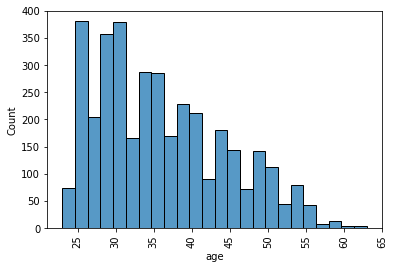

In [22]:
sns.histplot(x = dbc["age"],)
plt.xticks(rotation=90)

### Next, we make an additional calculation of the values in order to better view the data stored in the dataset

In [23]:
dbc['numAccountActiveAll'].value_counts()

1.0     974
2.0     906
3.0     626
0.0     476
4.0     344
5.0     185
6.0      90
7.0      35
8.0      19
9.0      14
10.0      5
14.0      1
11.0      1
12.0      1
Name: numAccountActiveAll, dtype: int64

In [24]:
dbc['EDUCATION'].value_counts()

высшее                                 2086
Высшее/Второе высшее/Ученая степень     624
среднее-специальное                     553
среднее                                 151
незаконченное высшее                    127
второе высшее                           114
*n.a.*                                   14
ученая степень                            6
Неполное среднее                          2
Name: EDUCATION, dtype: int64

In [25]:
dbc['EMPL_TYPE'].value_counts()

специалист                  1319
менеджер среднего звена      860
вспомогательный персонал     602
рабочий                      351
менеджер высшего звена       329
менеджер по продажам         113
торговый представитель       101
другое                         2
Name: EMPL_TYPE, dtype: int64

In [26]:
dbc['EMPL_SIZE'].value_counts()

>250      2778
< 50       897
*n.a.*       2
Name: EMPL_SIZE, dtype: int64

In [27]:
dbc['EMPL_PROPERTY'].value_counts()

Торговля                       2066
Другое                         1209
Информационные технологии       341
Юридические услуги               45
Сельское и лесное хозяйство      16
Name: EMPL_PROPERTY, dtype: int64

In [28]:
dbc['EMPL_FORM'].value_counts()

ООО                               2523
ЗАО                                485
ОАО                                384
Государственное предприятие        107
Индивидуальный предприниматель      94
Иная форма                          84
Name: EMPL_FORM, dtype: int64

In [29]:
dbc['FAMILY_STATUS'].value_counts()

женат / замужем         2035
холост / не замужем     1183
разведен / разведена     216
гражданский брак         157
повторный брак            84
вдовец / вдова             2
Name: FAMILY_STATUS, dtype: int64

## Heat map

### In order to see the dependencies between the various parameters of our customers, we build a heat map that allows us to analyze.

<ipython-input-30-09d9087f7036>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dbc.corr(), annot = True, fmt = '.1g', vmin = -0.5)


<AxesSubplot: >

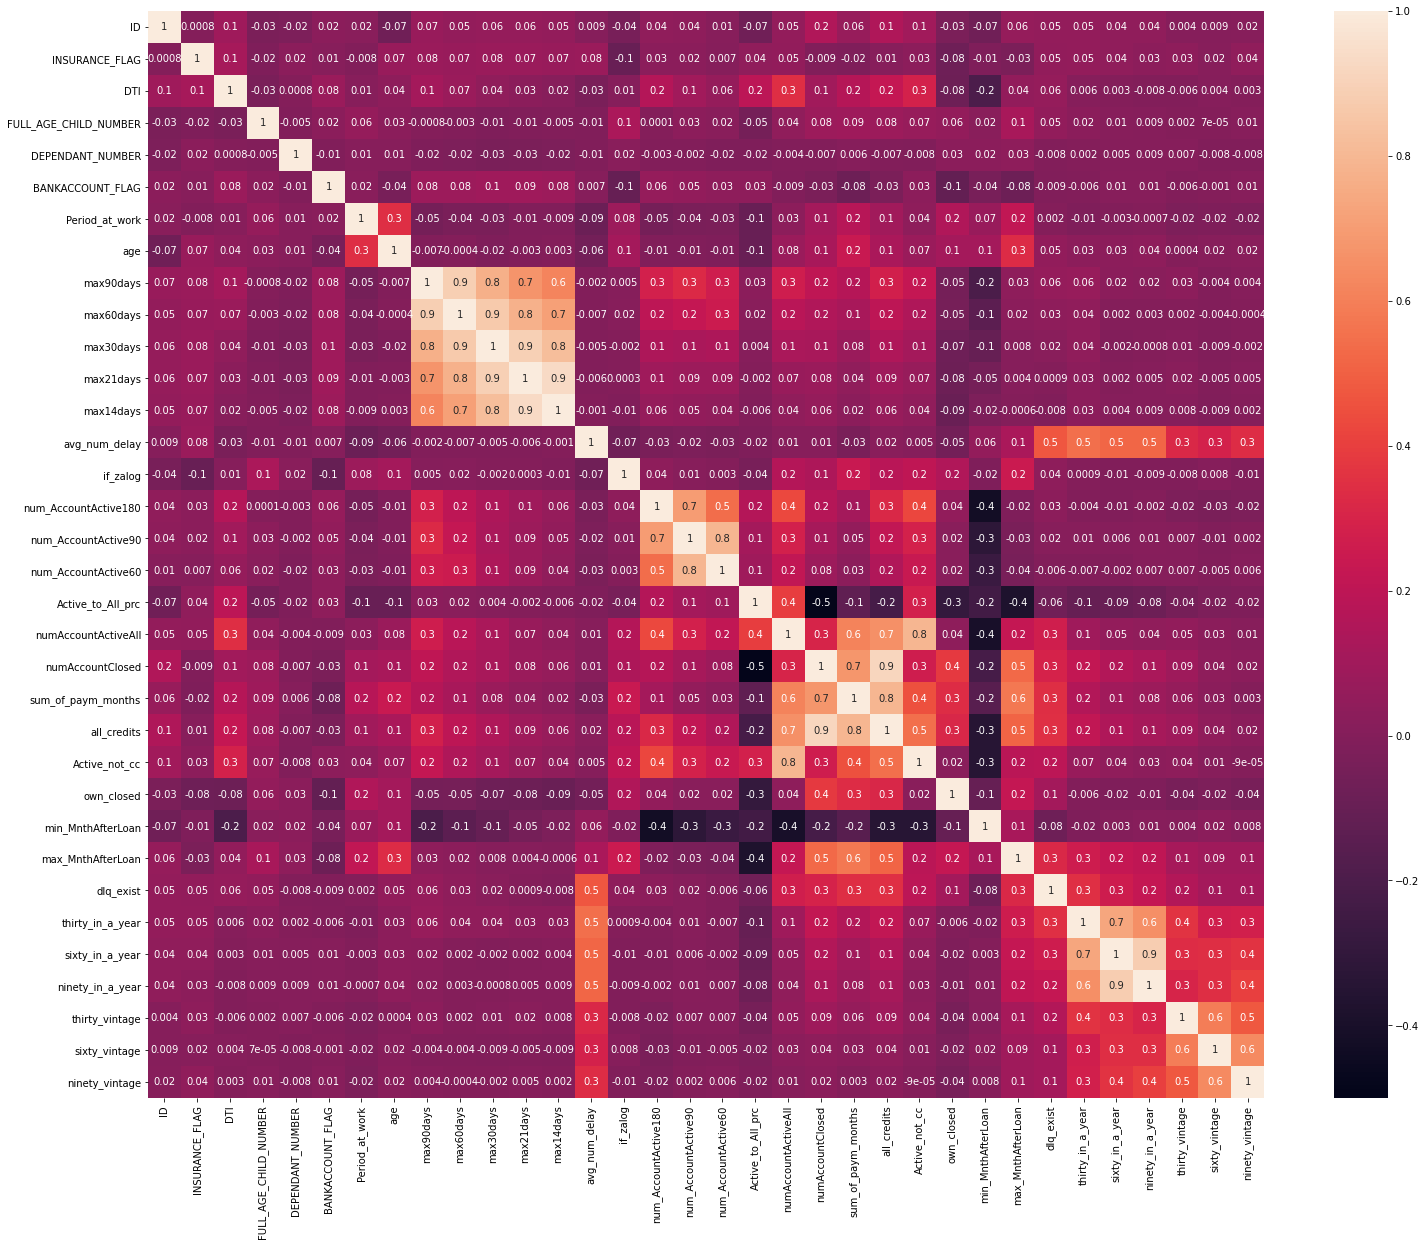

In [30]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(dbc.corr(), annot = True, fmt = '.1g', vmin = -0.5)

## Preparing the data showcase for segmentation
### Converting text data to binary using the one hot encoding method, which creates columns according to. different values of our variables and marks them with 1 and 0 if there is or is not a characteristic of a person.

In [31]:
dbc_one_hot_ecoded = pd.get_dummies(dbc, 
                                    columns = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE',
                                                  'SEX', 'EDUCATION', 'EMPL_TYPE', 
                                               'EMPL_SIZE','EMPL_PROPERTY', 
                                               'EMPL_FORM', 'FAMILY_STATUS'],
                                    
                                    prefix = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE',
                                                  'SEX', 'EDUCATION', 'EMPL_TYPE', 
                                               'EMPL_SIZE','EMPL_PROPERTY', 
                                               'EMPL_FORM', 'FAMILY_STATUS'])

In [32]:
dbc_ohe = dbc_one_hot_ecoded

In [33]:
dbc_ohe.head()

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
1,1000032,1.0,0.55,0,0,3.0,29.0,52.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,1000092,0.0,0.31,2,0,1.0,106.0,34.0,3.0,3.0,...,0,0,1,0,0,0,1,0,0,0
5,1000112,0.0,0.22,1,0,0.0,69.0,30.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
8,1000172,0.0,0.42,0,0,0.0,11.0,47.0,3.0,2.0,...,0,0,0,1,0,0,1,0,0,0
10,1000212,0.0,0.25,0,0,0.0,91.0,34.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0


In [34]:
dbc_ohe.describe()

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
count,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,...,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,1.098587e+06,0.611096,0.386222,0.539298,0.005167,0.308948,56.502040,35.902910,1.590699,1.128094,...,0.022845,0.025564,0.104433,0.686157,0.000544,0.042698,0.553440,0.022845,0.058744,0.321730
std,5.974881e+04,0.487568,0.137309,0.766826,0.082305,0.782187,55.594955,8.381257,1.898757,1.552725,...,0.149429,0.157853,0.305863,0.464116,0.023319,0.202203,0.497204,0.149429,0.235176,0.467203
min,1.000032e+06,0.000000,0.030000,0.000000,0.000000,0.000000,6.000000,23.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.046592e+06,0.000000,0.280000,0.000000,0.000000,0.000000,18.000000,29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.093772e+06,1.000000,0.400000,0.000000,0.000000,0.000000,38.000000,34.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.152232e+06,1.000000,0.490000,1.000000,0.000000,0.000000,76.000000,42.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.204832e+06,1.000000,0.590000,5.000000,2.000000,3.000000,558.000000,63.000000,20.000000,14.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
dbc_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 1 to 10241
Data columns (total 88 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ID                                                       3677 non-null   int64  
 1   INSURANCE_FLAG                                           3677 non-null   float64
 2   DTI                                                      3677 non-null   float64
 3   FULL_AGE_CHILD_NUMBER                                    3677 non-null   int64  
 4   DEPENDANT_NUMBER                                         3677 non-null   int64  
 5   BANKACCOUNT_FLAG                                         3677 non-null   float64
 6   Period_at_work                                           3677 non-null   float64
 7   age                                                      3677 non-null   float64
 8   max90days                  

### Next, we replace the spaces present in the column names with underscores to avoid errors in the future when referring to the columns and rename a few columns for the further convenience.

In [36]:
dbc_ohe = dbc_ohe.rename(columns=lambda col: col.replace(" ", "_"))

In [37]:
dbc_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 1 to 10241
Data columns (total 88 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ID                                                       3677 non-null   int64  
 1   INSURANCE_FLAG                                           3677 non-null   float64
 2   DTI                                                      3677 non-null   float64
 3   FULL_AGE_CHILD_NUMBER                                    3677 non-null   int64  
 4   DEPENDANT_NUMBER                                         3677 non-null   int64  
 5   BANKACCOUNT_FLAG                                         3677 non-null   float64
 6   Period_at_work                                           3677 non-null   float64
 7   age                                                      3677 non-null   float64
 8   max90days                  

In [38]:
dbc_ohe.rename(columns = {'EDUCATION_*n.a.*' : 'EDUCATION_na', 'EMPL_SIZE_*n.a.*' : 'EMPL_SIZE_na'}, inplace = True)

In [39]:
dbc_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 1 to 10241
Data columns (total 88 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ID                                                       3677 non-null   int64  
 1   INSURANCE_FLAG                                           3677 non-null   float64
 2   DTI                                                      3677 non-null   float64
 3   FULL_AGE_CHILD_NUMBER                                    3677 non-null   int64  
 4   DEPENDANT_NUMBER                                         3677 non-null   int64  
 5   BANKACCOUNT_FLAG                                         3677 non-null   float64
 6   Period_at_work                                           3677 non-null   float64
 7   age                                                      3677 non-null   float64
 8   max90days                  

### Preprocessing the data using the sklearn normalization library tool.

In [40]:
from sklearn import preprocessing 

In [41]:
d = preprocessing.normalize(dbc_ohe)
dbc_ohe_norm = pd.DataFrame(d, columns = dbc_ohe.columns)
dbc_ohe_norm.head()

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная_форма,EMPL_FORM_Индивидуальный_предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец_/_вдова,FAMILY_STATUS_гражданский_брак,FAMILY_STATUS_женат_/_замужем,FAMILY_STATUS_повторный_брак,FAMILY_STATUS_разведен_/_разведена,FAMILY_STATUS_холост_/_не_замужем
0,1.0,9.999680e-07,5.499824e-07,0.000000e+00,0.0,2.999904e-06,0.000029,0.000052,9.999680e-07,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,9.999680e-07,0.0,0.0,0.0
1,1.0,0.000000e+00,3.099715e-07,1.999816e-06,0.0,9.999080e-07,0.000106,0.000034,2.999724e-06,2.999724e-06,...,0.0,0.0,9.999080e-07,0.000000e+00,0.0,0.0,9.999080e-07,0.0,0.0,0.0
2,1.0,0.000000e+00,2.199754e-07,9.998880e-07,0.0,0.000000e+00,0.000069,0.000030,9.998880e-07,9.998880e-07,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,9.998880e-07,0.0,0.0,0.0
3,1.0,0.000000e+00,4.199278e-07,0.000000e+00,0.0,0.000000e+00,0.000011,0.000047,2.999484e-06,1.999656e-06,...,0.0,0.0,0.000000e+00,9.998280e-07,0.0,0.0,9.998280e-07,0.0,0.0,0.0
4,1.0,0.000000e+00,2.499470e-07,0.000000e+00,0.0,0.000000e+00,0.000091,0.000034,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,9.997880e-07,0.0,0.0,9.997880e-07,0.0,0.0,0.0


In [42]:
dbc_ohe_norm.describe()

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная_форма,EMPL_FORM_Индивидуальный_предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец_/_вдова,FAMILY_STATUS_гражданский_брак,FAMILY_STATUS_женат_/_замужем,FAMILY_STATUS_повторный_брак,FAMILY_STATUS_разведен_/_разведена,FAMILY_STATUS_холост_/_не_замужем
count,3.677000e+03,3.677000e+03,3.677000e+03,3.677000e+03,3.677000e+03,3.677000e+03,3677.000000,3677.000000,3.677000e+03,3.677000e+03,...,3.677000e+03,3.677000e+03,3.677000e+03,3.677000e+03,3.677000e+03,3.677000e+03,3.677000e+03,3.677000e+03,3.677000e+03,3.677000e+03
mean,1.000000e+00,5.578859e-07,3.519565e-07,4.934588e-07,4.815045e-09,2.810849e-07,0.000052,0.000033,1.445329e-06,1.025934e-06,...,2.122554e-08,2.304413e-08,9.507490e-08,6.255713e-07,5.252798e-10,3.794363e-08,5.041431e-07,2.100450e-08,5.406525e-08,2.952700e-07
std,1.165516e-08,4.468019e-07,1.254368e-07,7.029512e-07,7.674817e-08,7.092519e-07,0.000051,0.000008,1.725538e-06,1.413103e-06,...,1.390449e-07,1.425047e-07,2.789145e-07,4.251138e-07,2.252075e-08,1.799042e-07,4.544115e-07,1.375996e-07,2.167995e-07,4.296782e-07
min,9.999998e-01,0.000000e+00,2.741198e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000005,0.000019,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,2.548485e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000016,0.000026,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,8.583308e-07,3.652261e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000035,0.000031,9.396800e-07,8.704038e-07,...,0.000000e+00,0.000000e+00,0.000000e+00,8.708738e-07,0.000000e+00,0.000000e+00,8.442153e-07,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,9.287535e-07,4.511906e-07,9.216658e-07,0.000000e+00,0.000000e+00,0.000070,0.000038,1.908849e-06,1.678399e-06,...,0.000000e+00,0.000000e+00,0.000000e+00,9.339928e-07,0.000000e+00,0.000000e+00,9.178758e-07,0.000000e+00,0.000000e+00,8.661368e-07
max,1.000000e+00,9.999680e-07,5.897924e-07,4.446927e-06,1.933241e-06,2.999904e-06,0.000541,0.000061,1.939390e-05,1.299072e-05,...,9.975938e-07,9.983707e-07,9.999080e-07,9.998280e-07,9.748565e-07,9.996681e-07,9.999680e-07,9.980119e-07,9.994283e-07,9.997481e-07


In [43]:
pd.set_option("display.float_format", "{:.10f}".format)

In [44]:
dbc_ohe_norm.describe()

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная_форма,EMPL_FORM_Индивидуальный_предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец_/_вдова,FAMILY_STATUS_гражданский_брак,FAMILY_STATUS_женат_/_замужем,FAMILY_STATUS_повторный_брак,FAMILY_STATUS_разведен_/_разведена,FAMILY_STATUS_холост_/_не_замужем
count,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,...,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000,3677.0000000000
mean,0.9999999901,0.0000005579,0.0000003520,0.0000004935,0.0000000048,0.0000002811,0.0000515271,0.0000328055,0.0000014453,0.0000010259,...,0.0000000212,0.0000000230,0.0000000951,0.0000006256,0.0000000005,0.0000000379,0.0000005041,0.0000000210,0.0000000541,0.0000002953
std,0.0000000117,0.0000004468,0.0000001254,0.0000007030,0.0000000767,0.0000007093,0.0000507612,0.0000080047,0.0000017255,0.0000014131,...,0.0000001390,0.0000001425,0.0000002789,0.0000004251,0.0000000225,0.0000001799,0.0000004544,0.0000001376,0.0000002168,0.0000004297
min,0.9999998439,0.0000000000,0.0000000274,0.0000000000,0.0000000000,0.0000000000,0.0000049901,0.0000191091,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,0.9999999875,0.0000000000,0.0000002548,0.0000000000,0.0000000000,0.0000000000,0.0000164670,0.0000262464,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
50%,0.9999999936,0.0000008583,0.0000003652,0.0000000000,0.0000000000,0.0000000000,0.0000349837,0.0000313673,0.0000009397,0.0000008704,...,0.0000000000,0.0000000000,0.0000000000,0.0000008709,0.0000000000,0.0000000000,0.0000008442,0.0000000000,0.0000000000,0.0000000000
75%,0.9999999971,0.0000009288,0.0000004512,0.0000009217,0.0000000000,0.0000000000,0.0000696214,0.0000381849,0.0000019088,0.0000016784,...,0.0000000000,0.0000000000,0.0000000000,0.0000009340,0.0000000000,0.0000000000,0.0000009179,0.0000000000,0.0000000000,0.0000008661
max,0.9999999998,0.0000010000,0.0000005898,0.0000044469,0.0000019332,0.0000029999,0.0005407123,0.0000613251,0.0000193939,0.0000129907,...,0.0000009976,0.0000009984,0.0000009999,0.0000009998,0.0000009749,0.0000009997,0.0000010000,0.0000009980,0.0000009994,0.0000009997


### Next, we display diagrams of each of the parameters (columns) present in the table in order to illustrate the frequency of occurrence of certain parameters in our data and to show the presence/ absence of different data and to show visually their frequency.

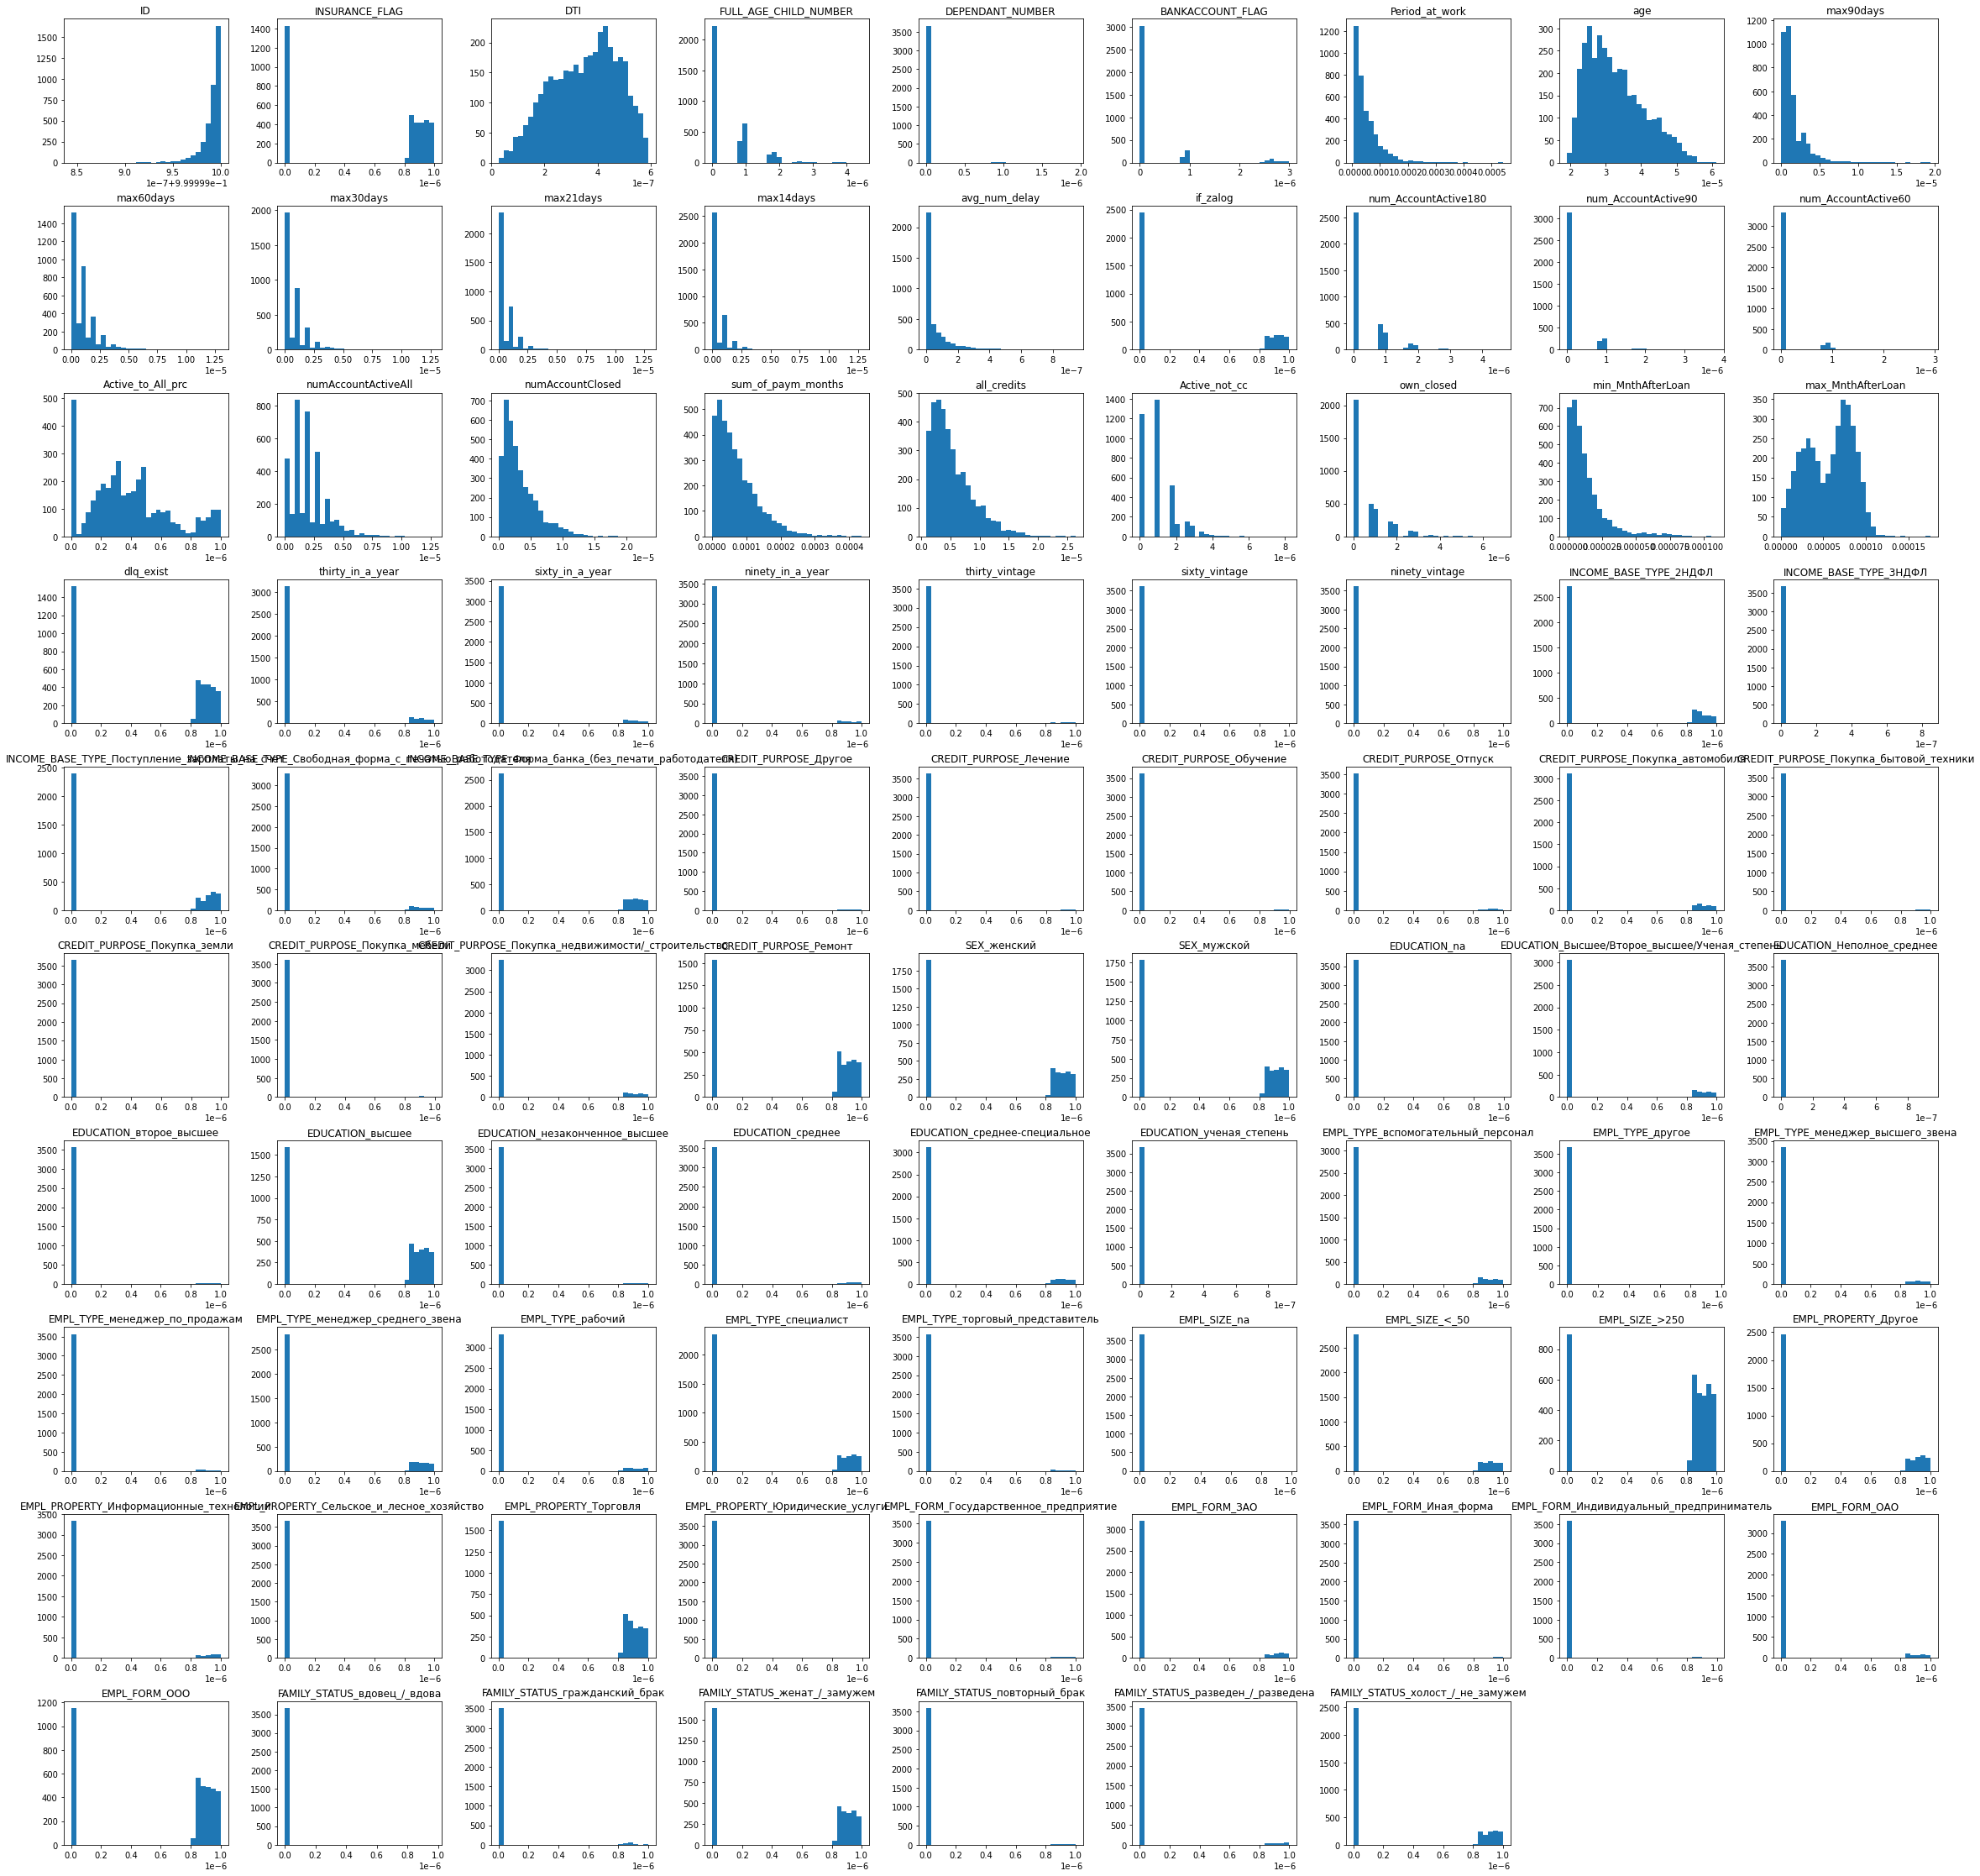

In [45]:
dbc_ohe_norm.hist(bins = 30, figsize = (40,40), grid = False)
plt.show()

# Part 2
## Data clusterization.
### Method 1 (K-Means)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Here we set the columns by which further division into clusters takes place.  
### These columns are the key ones and most of all affect the division of clients into clusters, based on the matrix of correlations of parameters.

In [47]:
X = dbc_ohe_norm[['age', 'DTI', 'Period_at_work','SEX_женский', 'SEX_мужской', 'EMPL_SIZE_na', 'EMPL_SIZE_<_50', 'EMPL_SIZE_>250', 'max90days', 'all_credits', 'sum_of_paym_months']].copy()

In [48]:
dbc_ohe_norm.corr()

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная_форма,EMPL_FORM_Индивидуальный_предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец_/_вдова,FAMILY_STATUS_гражданский_брак,FAMILY_STATUS_женат_/_замужем,FAMILY_STATUS_повторный_брак,FAMILY_STATUS_разведен_/_разведена,FAMILY_STATUS_холост_/_не_замужем
ID,1.0000000000,-0.0082737514,-0.1200128772,-0.0779277928,-0.0118831286,0.0455972977,-0.6280756096,-0.3837401329,-0.0868292010,-0.0764916773,...,-0.0230092283,-0.0119886859,-0.0878572934,0.1069065840,-0.0147519625,0.0215041103,-0.0900294930,-0.0266964171,0.0198984008,0.0807850336
INSURANCE_FLAG,-0.0082737514,1.0000000000,0.1231329872,-0.0140151893,0.0253179349,0.0099512751,-0.0065621148,0.0883440950,0.0735657980,0.0689112378,...,-0.0357314171,-0.0005385900,-0.0026846852,0.0219800796,0.0213006892,0.0024262875,-0.0266759610,0.0034938704,0.0238451079,0.0206996026
DTI,-0.1200128772,0.1231329872,1.0000000000,-0.0225182592,0.0034030549,0.0787300492,0.0106805685,0.0616753031,0.1008988453,0.0685369032,...,-0.0181924040,-0.0180504499,0.0129488854,-0.0091421636,0.0027317726,0.0100630710,0.0152604615,-0.0297732451,0.0016184319,-0.0049884816
FULL_AGE_CHILD_NUMBER,-0.0779277928,-0.0140151893,-0.0225182592,1.0000000000,-0.0049367596,0.0221974557,0.0627354039,0.0448401839,0.0041322241,0.0033972884,...,0.0455435055,0.0179633408,0.0054271270,-0.0316691147,0.0320076476,-0.0599856218,0.2844923559,0.0980727036,0.0410685764,-0.3219858248
DEPENDANT_NUMBER,-0.0118831286,0.0253179349,0.0034030549,-0.0049367596,1.0000000000,-0.0132532083,0.0160503190,0.0190132748,-0.0191369625,-0.0229493701,...,-0.0095797477,-0.0101480268,-0.0006939243,0.0101536605,-0.0014637210,-0.0132357361,0.0441375188,-0.0095795652,0.0003224315,-0.0351142550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FAMILY_STATUS_гражданский_брак,0.0215041103,0.0024262875,0.0100630710,-0.0599856218,-0.0132357361,0.0247712734,-0.0224701955,-0.0792272328,0.0524117081,0.0438056739,...,-0.0322047071,0.0144546650,-0.0117532363,0.0167008709,-0.0049206628,1.0000000000,-0.2340562596,-0.0322040935,-0.0526109078,-0.1449745668
FAMILY_STATUS_женат_/_замужем,-0.0900294930,-0.0266759610,0.0152604615,0.2844923559,0.0441375188,0.0002117230,0.1258300253,0.1483944126,-0.0376140969,-0.0343685375,...,0.0370688408,0.0178299690,0.0250722441,-0.0476265277,-0.0258839456,-0.2340562596,1.0000000000,-0.1694017752,-0.2767468421,-0.7626033315
FAMILY_STATUS_повторный_брак,-0.0266964171,0.0034938704,-0.0297732451,0.0980727036,-0.0095795652,0.0297180583,0.0008310384,0.0153652357,0.0225512974,0.0275633739,...,0.0384898137,-0.0246913358,0.0059043168,0.0129047213,-0.0035614045,-0.0322040935,-0.1694017752,1.0000000000,-0.0380779441,-0.1049275461
FAMILY_STATUS_разведен_/_разведена,0.0198984008,0.0238451079,0.0016184319,0.0410685764,0.0003224315,0.0480611550,-0.0203119610,0.0495543188,0.0246599629,0.0153388649,...,-0.0221693959,0.0015196098,-0.0008764234,0.0036732442,-0.0058181647,-0.0526109078,-0.2767468421,-0.0380779441,1.0000000000,-0.1714171354


In [49]:
dbc_ohe_norm.columns

Index(['ID', 'INSURANCE_FLAG', 'DTI', 'FULL_AGE_CHILD_NUMBER',
       'DEPENDANT_NUMBER', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age',
       'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
       'avg_num_delay', 'if_zalog', 'num_AccountActive180',
       'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc',
       'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months',
       'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan',
       'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year',
       'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage',
       'INCOME_BASE_TYPE_2НДФЛ', 'INCOME_BASE_TYPE_3НДФЛ',
       'INCOME_BASE_TYPE_Поступление_зарплаты_на_счет',
       'INCOME_BASE_TYPE_Свободная_форма_с_печатью_работодателя',
       'INCOME_BASE_TYPE_Форма_банка_(без_печати_работодателя)',
       'CREDIT_PURPOSE_Другое', 'CREDIT_PURPOSE_Лечение',
       'CREDIT_PURPOSE_Обучение', 'CREDIT_PURPOSE

In [50]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

In [51]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [52]:
sns.set()

### Elbow method
#### In this case, we use the elbow method in order to analyze and understand what is the required number of clusters we need to put during segmentation for optimal separation.

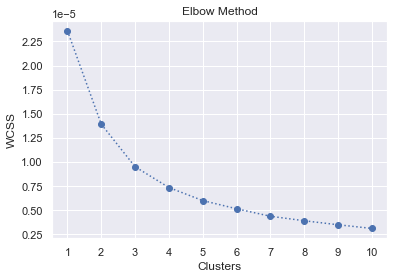

In [53]:
plt.plot(range(1, 11,), wcss, ':o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.locator_params (axis='x', nbins= 11 )
plt.locator_params (axis='y', nbins= 11 )
plt.show()

### This graph reflects a decrease in intra-class variance (the relationship between the value of k and the sum of squared distances within clusters) to find the optimal value of k using the k-means algorithm. We see that the two largest fractures occur at values k = 2, k = 3, k = 4.
### The number 2 is too small to be divided into clusters, as the groups will turn out to be too extensive and inaccurate. From this it should be concluded that the optimal number of clusters will be either 3 or 4.

### To apply the k-means algorithm, we need to translate our dataframe to the numpy array type.

In [54]:
X = dbc_ohe_norm.to_numpy()
X

array([[9.99999992e-01, 9.99967993e-07, 5.49982396e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999981e-01, 0.00000000e+00, 3.09971477e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999973e-01, 0.00000000e+00, 2.19975357e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99999992e-01, 0.00000000e+00, 3.40319001e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999998e-01, 8.30032569e-07, 4.64818238e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999997e-01, 0.00000000e+00, 3.15396668e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [55]:
cluster_num = 4
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 3 ... 0 0 0]


### Next, we mark the selected clusters and create a column with the cluster numbers that the client referred to after applying this algorithm.

In [56]:
dbc_ohe_norm["cluster_names"] = labels
dbc_ohe["cluster_names"] = labels
dbc_ohe_norm.head()

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Индивидуальный_предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец_/_вдова,FAMILY_STATUS_гражданский_брак,FAMILY_STATUS_женат_/_замужем,FAMILY_STATUS_повторный_брак,FAMILY_STATUS_разведен_/_разведена,FAMILY_STATUS_холост_/_не_замужем,cluster_names
0,0.9999999916,0.0000010000,0.0000005500,0.0000000000,0.0000000000,0.0000029999,0.0000289991,0.0000519983,0.0000010000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000010000,0.0000000000,0.0000000000,0.0000000000,1
1,0.9999999806,0.0000000000,0.0000003100,0.0000019998,0.0000000000,0.0000009999,0.0001059902,0.0000339969,0.0000029997,0.0000029997,...,0.0000000000,0.0000009999,0.0000000000,0.0000000000,0.0000000000,0.0000009999,0.0000000000,0.0000000000,0.0000000000,1
2,0.9999999733,0.0000000000,0.0000002200,0.0000009999,0.0000000000,0.0000000000,0.0000689923,0.0000299966,0.0000009999,0.0000009999,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000009999,0.0000000000,0.0000000000,0.0000000000,3
3,0.9999999835,0.0000000000,0.0000004199,0.0000000000,0.0000000000,0.0000000000,0.0000109981,0.0000469919,0.0000029995,0.0000019997,...,0.0000000000,0.0000000000,0.0000009998,0.0000000000,0.0000000000,0.0000009998,0.0000000000,0.0000000000,0.0000000000,1
4,0.9999999873,0.0000000000,0.0000002499,0.0000000000,0.0000000000,0.0000000000,0.0000909807,0.0000339928,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000009998,0.0000000000,0.0000000000,0.0000009998,0.0000000000,0.0000000000,0.0000000000,1


### We find a table with average and median values for four clusters.

In [57]:
four_classes_table_mean = dbc_ohe.groupby('cluster_names').mean()
four_classes_table_median = dbc_ohe.groupby('cluster_names').median()
four_classes_table_mode = dbc_ohe.groupby('cluster_names').agg(pd.Series.mode)
four_classes_table_mean

<ipython-input-57-8d17b84cd15a>:3: FutureWarning: ['ID'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  four_classes_table_mode = dbc_ohe.groupby('cluster_names').agg(pd.Series.mode)


,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная_форма,EMPL_FORM_Индивидуальный_предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец_/_вдова,FAMILY_STATUS_гражданский_брак,FAMILY_STATUS_женат_/_замужем,FAMILY_STATUS_повторный_брак,FAMILY_STATUS_разведен_/_разведена,FAMILY_STATUS_холост_/_не_замужем
cluster_names,,,,,,,,,,,,,,,,,,,,,
0,1098277.1438240272,0.6232374506,0.3728821207,0.4512126340,0.0039481105,0.3558939650,36.3401015228,33.3620981387,1.4624929498,1.0603496898,...,0.0203045685,0.0242526791,0.0902425268,0.7179921038,0.0000000000,0.0468133108,0.5115623237,0.0169204738,0.0490693739,0.3756345178
1,1101107.7921635434,0.5996592845,0.3922572402,0.6005110733,0.0051107325,0.2623509370,44.5638841567,36.3586030664,1.6797274276,1.1482112436,...,0.0221465077,0.0229982964,0.0971039182,0.7120954003,0.0008517888,0.0442930153,0.5511073254,0.0289608177,0.0749574106,0.2998296422
2,1093455.3242506811,0.5803814714,0.3837329700,0.6348773842,0.0081743869,0.3324250681,178.0681198910,42.6049046322,1.2806539510,0.9727520436,...,0.0272479564,0.0299727520,0.1989100817,0.4713896458,0.0000000000,0.0299727520,0.7138964578,0.0190735695,0.0653950954,0.1716621253
3,1097140.7052341597,0.6198347107,0.4343801653,0.6749311295,0.0082644628,0.2066115702,70.6831955923,40.0633608815,2.2424242424,1.5509641873,...,0.0330578512,0.0358126722,0.1019283747,0.6639118457,0.0027548209,0.0303030303,0.6033057851,0.0358126722,0.0468319559,0.2809917355


### Visualization for 4 clusters

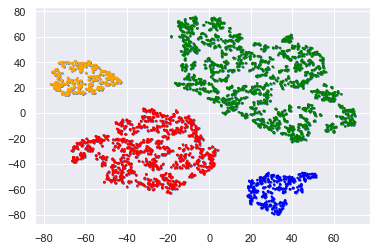

In [58]:
from sklearn.manifold import TSNE

tsne_df = TSNE(n_components=2, perplexity=20).fit_transform(dbc_ohe_norm)
dbc_ohe_norm["tsneX"] = tsne_df[:,0]
dbc_ohe_norm["tsneY"] = tsne_df[:,1]

plt.scatter(dbc_ohe_norm["tsneX"], dbc_ohe_norm["tsneY"],s=2,)

def colorer(row,column):
    if row[column] == 0:
        return "Green"
    if row[column] == 1:
        return "Red"
    if row[column] == 2:
        return "Blue"    
    return "Orange"

dbc_ohe_norm["цвет"] = dbc_ohe_norm.apply(colorer,axis = 1,column = "cluster_names")
plt.scatter(dbc_ohe_norm["tsneX"], dbc_ohe_norm["tsneY"],s=2,c=list(dbc_ohe_norm['цвет']))
plt.show()

### Next, we perform similar operations for 3 clusters.

In [59]:
cluster_num = 3
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 0 0 ... 2 2 2]


In [60]:
dbc_ohe_norm.drop(columns = dbc_ohe_norm.columns[-1], axis = 1, inplace = True)

In [61]:
dbc_ohe_norm["cluster_names"] = labels
dbc_ohe["cluster_names"] = labels
dbc_ohe_norm.head()

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_ООО,FAMILY_STATUS_вдовец_/_вдова,FAMILY_STATUS_гражданский_брак,FAMILY_STATUS_женат_/_замужем,FAMILY_STATUS_повторный_брак,FAMILY_STATUS_разведен_/_разведена,FAMILY_STATUS_холост_/_не_замужем,cluster_names,tsneX,tsneY
0,0.9999999916,0.0000010000,0.0000005500,0.0000000000,0.0000000000,0.0000029999,0.0000289991,0.0000519983,0.0000010000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000010000,0.0000000000,0.0000000000,0.0000000000,2,-42.7323684692,-13.8629627228
1,0.9999999806,0.0000000000,0.0000003100,0.0000019998,0.0000000000,0.0000009999,0.0001059902,0.0000339969,0.0000029997,0.0000029997,...,0.0000000000,0.0000000000,0.0000000000,0.0000009999,0.0000000000,0.0000000000,0.0000000000,0,2.0501811504,-41.1907424927
2,0.9999999733,0.0000000000,0.0000002200,0.0000009999,0.0000000000,0.0000000000,0.0000689923,0.0000299966,0.0000009999,0.0000009999,...,0.0000000000,0.0000000000,0.0000000000,0.0000009999,0.0000000000,0.0000000000,0.0000000000,0,-62.4733314514,22.2361946106
3,0.9999999835,0.0000000000,0.0000004199,0.0000000000,0.0000000000,0.0000000000,0.0000109981,0.0000469919,0.0000029995,0.0000019997,...,0.0000009998,0.0000000000,0.0000000000,0.0000009998,0.0000000000,0.0000000000,0.0000000000,0,-5.2254667282,-11.9808416367
4,0.9999999873,0.0000000000,0.0000002499,0.0000000000,0.0000000000,0.0000000000,0.0000909807,0.0000339928,0.0000000000,0.0000000000,...,0.0000009998,0.0000000000,0.0000000000,0.0000009998,0.0000000000,0.0000000000,0.0000000000,1,-18.3077926636,-59.7918052673


In [62]:
dbc_ohe_norm.groupby('cluster_names').mean()

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец_/_вдова,FAMILY_STATUS_гражданский_брак,FAMILY_STATUS_женат_/_замужем,FAMILY_STATUS_повторный_брак,FAMILY_STATUS_разведен_/_разведена,FAMILY_STATUS_холост_/_не_замужем,tsneX,tsneY
cluster_names,,,,,,,,,,,,,,,,,,,,,
0,0.9999999798,0.0000005529,0.0000003812,0.0000006054,0.0000000068,0.0000002002,0.0000490534,0.0000346639,0.0000018865,0.0000012868,...,0.0000000885,0.0000006263,0.0000000011,0.0000000326,0.0000005143,0.0000000311,0.0000000518,0.0000002819,-34.2181053162,-0.1538889259
1,0.9999999782,0.0000005232,0.0000003514,0.0000005859,0.0000000062,0.0000002925,0.0001540715,0.0000388527,0.0000011784,0.0000008829,...,0.0000001713,0.0000004507,0.0000000022,0.0000000312,0.0000006403,0.0000000210,0.0000000531,0.0000001687,24.5126266479,-56.6693267822
2,0.9999999958,0.0000005659,0.0000003419,0.0000004376,0.0000000039,0.0000003072,0.0000337841,0.0000310603,0.0000013399,0.0000009609,...,0.0000000835,0.0000006570,0.0000000000,0.0000000410,0.0000004759,0.0000000175,0.0000000550,0.0000003229,6.7231364250,10.5262117386


### Visualization for 3 clusters

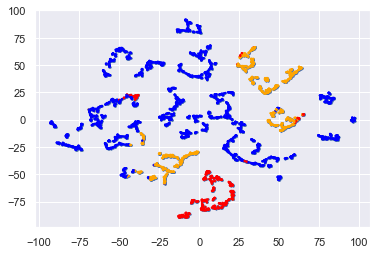

In [63]:
from sklearn.manifold import TSNE

tsne_df = TSNE(n_components=2, perplexity=20).fit_transform(dbc_ohe_norm)
dbc_ohe_norm["tsneX"] = tsne_df[:,0]
dbc_ohe_norm["tsneY"] = tsne_df[:,1]

plt.scatter(dbc_ohe_norm["tsneX"], dbc_ohe_norm["tsneY"],s=2,)

def colorer(row,column):
    if row[column] == 1:
        return "Red"
    if row[column] == 2:
        return "Blue"    
    return "Orange"

dbc_ohe_norm["цвет"] = dbc_ohe_norm.apply(colorer,axis = 1,column = "cluster_names")
plt.scatter(dbc_ohe_norm["tsneX"], dbc_ohe_norm["tsneY"],s=2,c=list(dbc_ohe_norm['цвет']))
plt.show()

In [64]:
three_classes_table = dbc_ohe_norm.groupby('cluster_names').mean()
three_classes_table

<ipython-input-64-30c90ba8035b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  three_classes_table = dbc_ohe_norm.groupby('cluster_names').mean()


,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец_/_вдова,FAMILY_STATUS_гражданский_брак,FAMILY_STATUS_женат_/_замужем,FAMILY_STATUS_повторный_брак,FAMILY_STATUS_разведен_/_разведена,FAMILY_STATUS_холост_/_не_замужем,tsneX,tsneY
cluster_names,,,,,,,,,,,,,,,,,,,,,
0,0.9999999798,0.0000005529,0.0000003812,0.0000006054,0.0000000068,0.0000002002,0.0000490534,0.0000346639,0.0000018865,0.0000012868,...,0.0000000885,0.0000006263,0.0000000011,0.0000000326,0.0000005143,0.0000000311,0.0000000518,0.0000002819,19.4595546722,3.3448219299
1,0.9999999782,0.0000005232,0.0000003514,0.0000005859,0.0000000062,0.0000002925,0.0001540715,0.0000388527,0.0000011784,0.0000008829,...,0.0000001713,0.0000004507,0.0000000022,0.0000000312,0.0000006403,0.0000000210,0.0000000531,0.0000001687,6.5186696053,-56.0923843384
2,0.9999999958,0.0000005659,0.0000003419,0.0000004376,0.0000000039,0.0000003072,0.0000337841,0.0000310603,0.0000013399,0.0000009609,...,0.0000000835,0.0000006570,0.0000000000,0.0000000410,0.0000004759,0.0000000175,0.0000000550,0.0000003229,-8.6478462219,9.3292560577


In [65]:
four_classes_table_mean = four_classes_table_mean.T
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('display.max_rows', None)

four_classes_table_mean

cluster_names,0,1,2,3
ID,1098277.14,1101107.79,1093455.32,1097140.71
INSURANCE_FLAG,0.62,0.60,0.58,0.62
DTI,0.37,0.39,0.38,0.43
FULL_AGE_CHILD_NUMBER,0.45,0.60,0.63,0.67
DEPENDANT_NUMBER,0.00,0.01,0.01,0.01
BANKACCOUNT_FLAG,0.36,0.26,0.33,0.21
Period_at_work,36.34,44.56,178.07,70.68
age,33.36,36.36,42.60,40.06
max90days,1.46,1.68,1.28,2.24
max60days,1.06,1.15,0.97,1.55


In [66]:
four_classes_table_median = four_classes_table_median.T
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('display.max_rows', None)

four_classes_table_median

cluster_names,0,1,2,3
ID,1092372.00,1097462.00,1091112.00,1095132.00
INSURANCE_FLAG,1.00,1.00,1.00,1.00
DTI,0.39,0.41,0.39,0.45
FULL_AGE_CHILD_NUMBER,0.00,0.00,0.00,0.00
DEPENDANT_NUMBER,0.00,0.00,0.00,0.00
BANKACCOUNT_FLAG,0.00,0.00,0.00,0.00
Period_at_work,29.00,39.00,157.00,61.00
age,31.00,35.00,42.00,39.00
max90days,1.00,1.00,1.00,2.00
max60days,1.00,1.00,1.00,1.00


In [67]:
four_classes_table_mode.T

cluster_names,0,1,2,3
INSURANCE_FLAG,1.00,1.00,1.00,1.00
DTI,0.49,0.49,0.59,0.59
FULL_AGE_CHILD_NUMBER,0,0,0,0
DEPENDANT_NUMBER,0,0,0,0
BANKACCOUNT_FLAG,0.00,0.00,0.00,0.00
Period_at_work,6.00,6.00,125.00,"[11.0, 30.0]"
age,26.00,30.00,37.00,39.00
max90days,0.00,1.00,0.00,1.00
max60days,0.00,0.00,0.00,1.00
max30days,0.00,0.00,0.00,0.00


## Conclusions for clustering using the k-means method:

## Received clusters:
### ----------------------------------------
## 1. "Desperate"
#### - Woman
#### - 39 years old
#### - There are debts
#### - There are children
#### - The number of open accounts is more than 5
#### - There is a mortgaged property
#### - The average number of all credits is more than 10
#### - Training
#### - Middle Manager
#### - Married

## Segment Conclusions:
#### - Will continue to take loans since she has children
#### - Will close one loan with another
#### - Pulls out the family
#### - High probability of repayment by a loan at the expense of another or with an increase in the po
#### - Looking for growth prospects in order to reach another level of earnings
### ---------------------------------------------------------------------------------------------------
## 2. "Strong and independent"
#### - A woman
#### - 31 years old
#### - No children
#### - No arrears
#### - Buying a car
#### - Specialist
#### - Not married

## Segment Conclusions:
#### - Young 
#### - Takes a loan for their improvement of living standards 
#### - A good client, as he repays debts in a timely manner 
#### - It is worth offering the most favorable conditions, as the most promising
### ---------------------------------------------------------------------------------------------------
## 3. "Workaholic"
#### - Man
#### - 42 years old
#### - There are children
#### - Repair
#### - Employee of a State-owned company
#### - Married

## Segment Conclusions:
#### - The largest number of hours of work 
#### - Good credit history
#### - There are obligations, as there is a family and children
#### - Small earnings, but a reliable client
#### - In the absence of great prospects, you should just warm up this client, with good conditions
### ---------------------------------------------------------------------------------------------------
## 4. "Unenviable bachelor"
#### - Man
#### - 45 years old
#### - There are children
#### - There were loans
#### - There are debts
#### - The average number of credits is more than 7
#### - Real Estate
#### - IT / Manager
#### - Divorced

## Segment Conclusions:
#### - Since he is divorced, he is obliged to pay alimony
#### - Low probability of closing the loan, since it is not burdened with anything
#### - Low solvency
#### - Perhaps the most unattractive customer who may not repay the loans issued

### ---------------------------------------------------------------------------------------------------

## Conclusions by the method:
#### Advantages:
#### - This method allows you to form portraits of clients of each cluster in some detail
#### Disadvantages:
#### - Insufficient detail and visibility of the results obtained

### Method 2 (Decision trees)

In [68]:
Y = dbc_ohe['cluster_names']
X = dbc_ohe[[ 'age', 'max90days', 'sum_of_paym_months','all_credits', 'FULL_AGE_CHILD_NUMBER']].copy()

In [69]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = Y[:-50]
Y_test = Y[-50:]

In [70]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=0)
clf.fit(X_train, Y_train)
clf.score (X_train, Y_train) 

0.865729252826027

In [71]:
clf.score (X_test, Y_test)

0.94

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,  max_depth=6,  random_state=21)
rfc.fit(X_train, Y_train)
rfc.score (X_test, Y_test)

0.94

In [73]:
import eli5
eli5.explain_weights_sklearn(clf, feature_names=X_train.columns.values)

/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


Weight,Feature
0.9477,sum_of_paym_months
0.0523,age
0,FULL_AGE_CHILD_NUMBER
0,all_credits
0,max90days


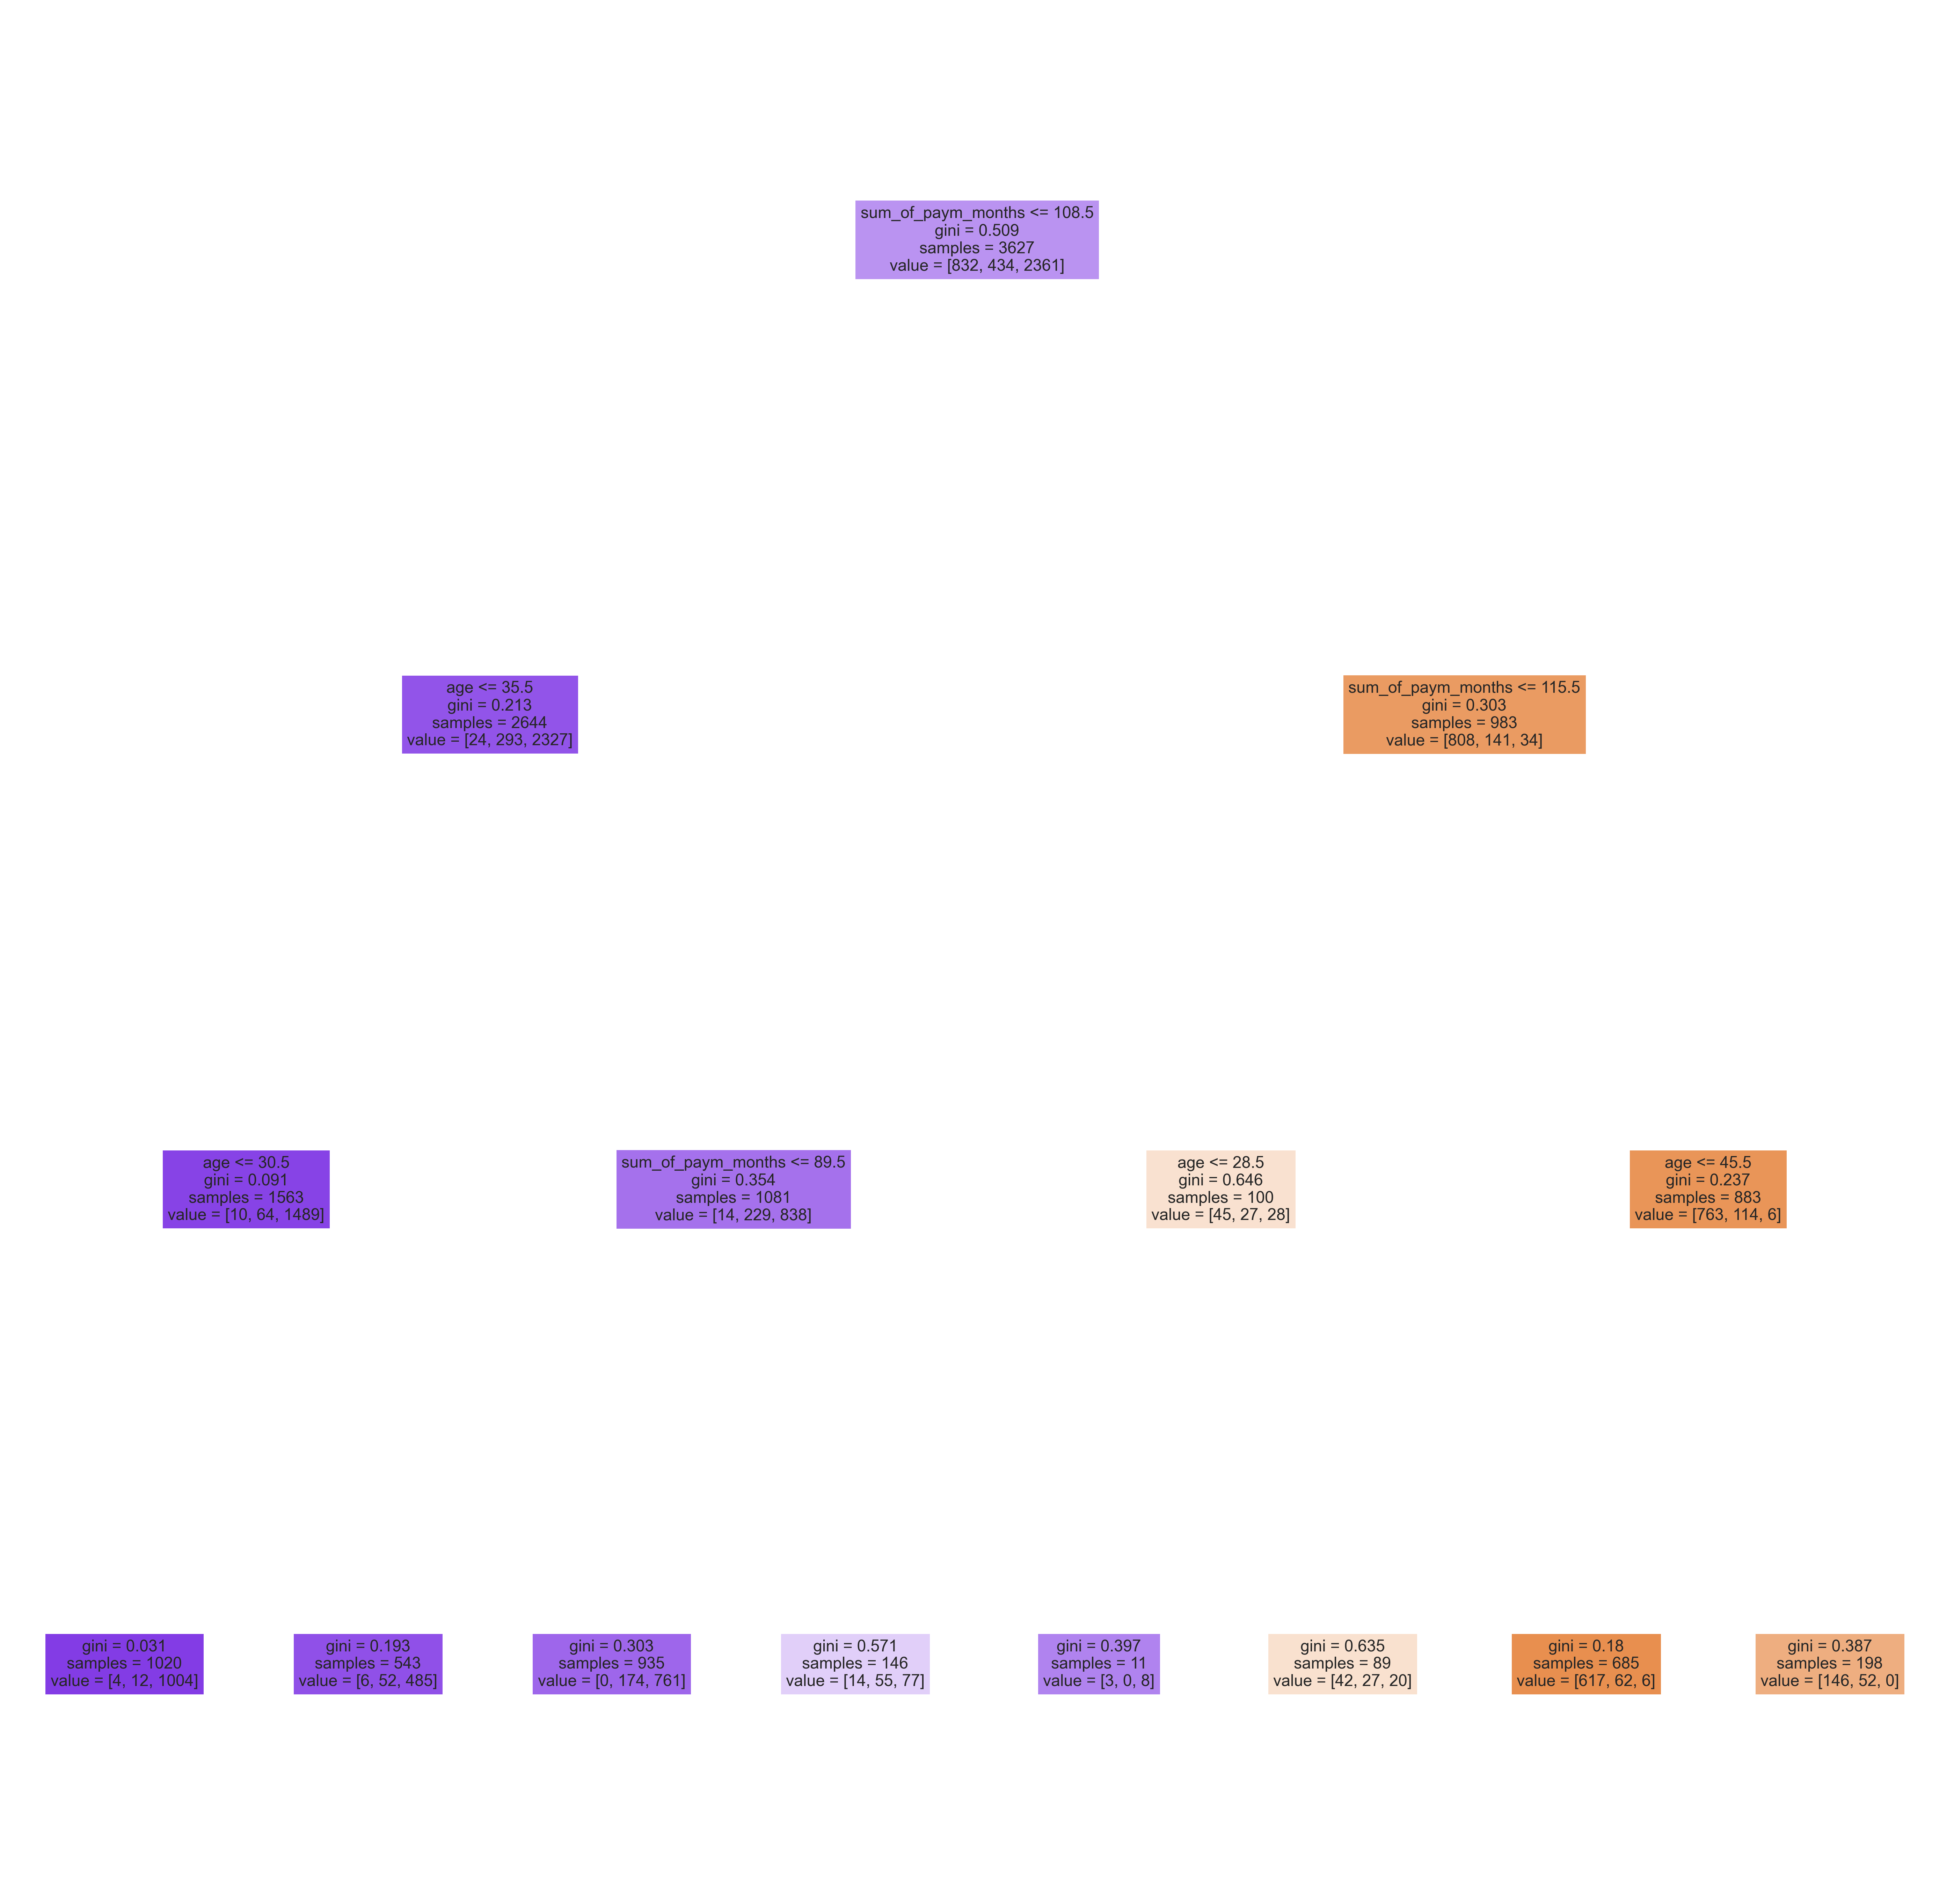

In [74]:
from sklearn import tree
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf, filled = True, 
                   feature_names = X_train.columns.values, )

## Interpretation of clusters
### -------------------------------------------------------------------------------------
### Based on the application of the decision tree for the normalized dataset, it can be seen that the main parameters of the separation were the amount of monthly payments and the age of the client, the other criteria turned out to be too insignificant for the trained tree and were not taken into account. To visually see the divisions and boundaries, we return a non-normalized dataset, the presence of which does not affect the division, but only shows the correct and visual boundary values.
### ---------------------------------------------------------------------------------------------------
### As a result, we got 8 clusters into which the clients were divided :
### 1. Clients with monthly payments of less than 108.5 thousand rubles and younger than 31 years
#### Based on this decision tree, we can conclude that this group of customers is the least attractive.
### 2. Clients with monthly payments of less than 108.5 thousand rubles and older than 30 years
### 3. Clients with monthly payments of less than 89.5 thousand rubles and older than 35 years
### 4. Clients with monthly payments of 89.5 - 108.5 thousand rubles and older than 35 years
### 5. Clients with monthly payments of 108.5 - 115.5 thousand rubles and younger than 29 years
#### Based on this decision tree, it can be concluded that this group of clients is very attractive because it is the youngest of all represented.
### 6. Clients with the amount of monthly payments of 108.5 - 115.5 thousand rubles and older than 28 years
### 7. Clients with monthly payments of more than 115.5 thousand rubles and under 46 years of age
### 8. Clients with monthly payments of more than 115.5 thousand rubles and over 45 years of age
#### The most trustworthy group of clients as it has the highest earnings and greater stability.

In [75]:
Y = dbc_ohe['cluster_names']
X = dbc_ohe[[ 'all_credits', 'min_MnthAfterLoan']].copy()

In [76]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = Y[:-50]
Y_test = Y[-50:]

In [77]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=0)
clf.fit(X_train, Y_train)
clf.score (X_train, Y_train) 

0.7576509511993383

In [78]:
clf.score (X_test, Y_test)

0.88

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,  max_depth=6,  random_state=21)
rfc.fit(X_train, Y_train)
rfc.score (X_test, Y_test)

0.86

In [80]:
import eli5
eli5.explain_weights_sklearn(clf, feature_names=X_train.columns.values)

Weight,Feature
0.9385,all_credits
0.0615,min_MnthAfterLoan


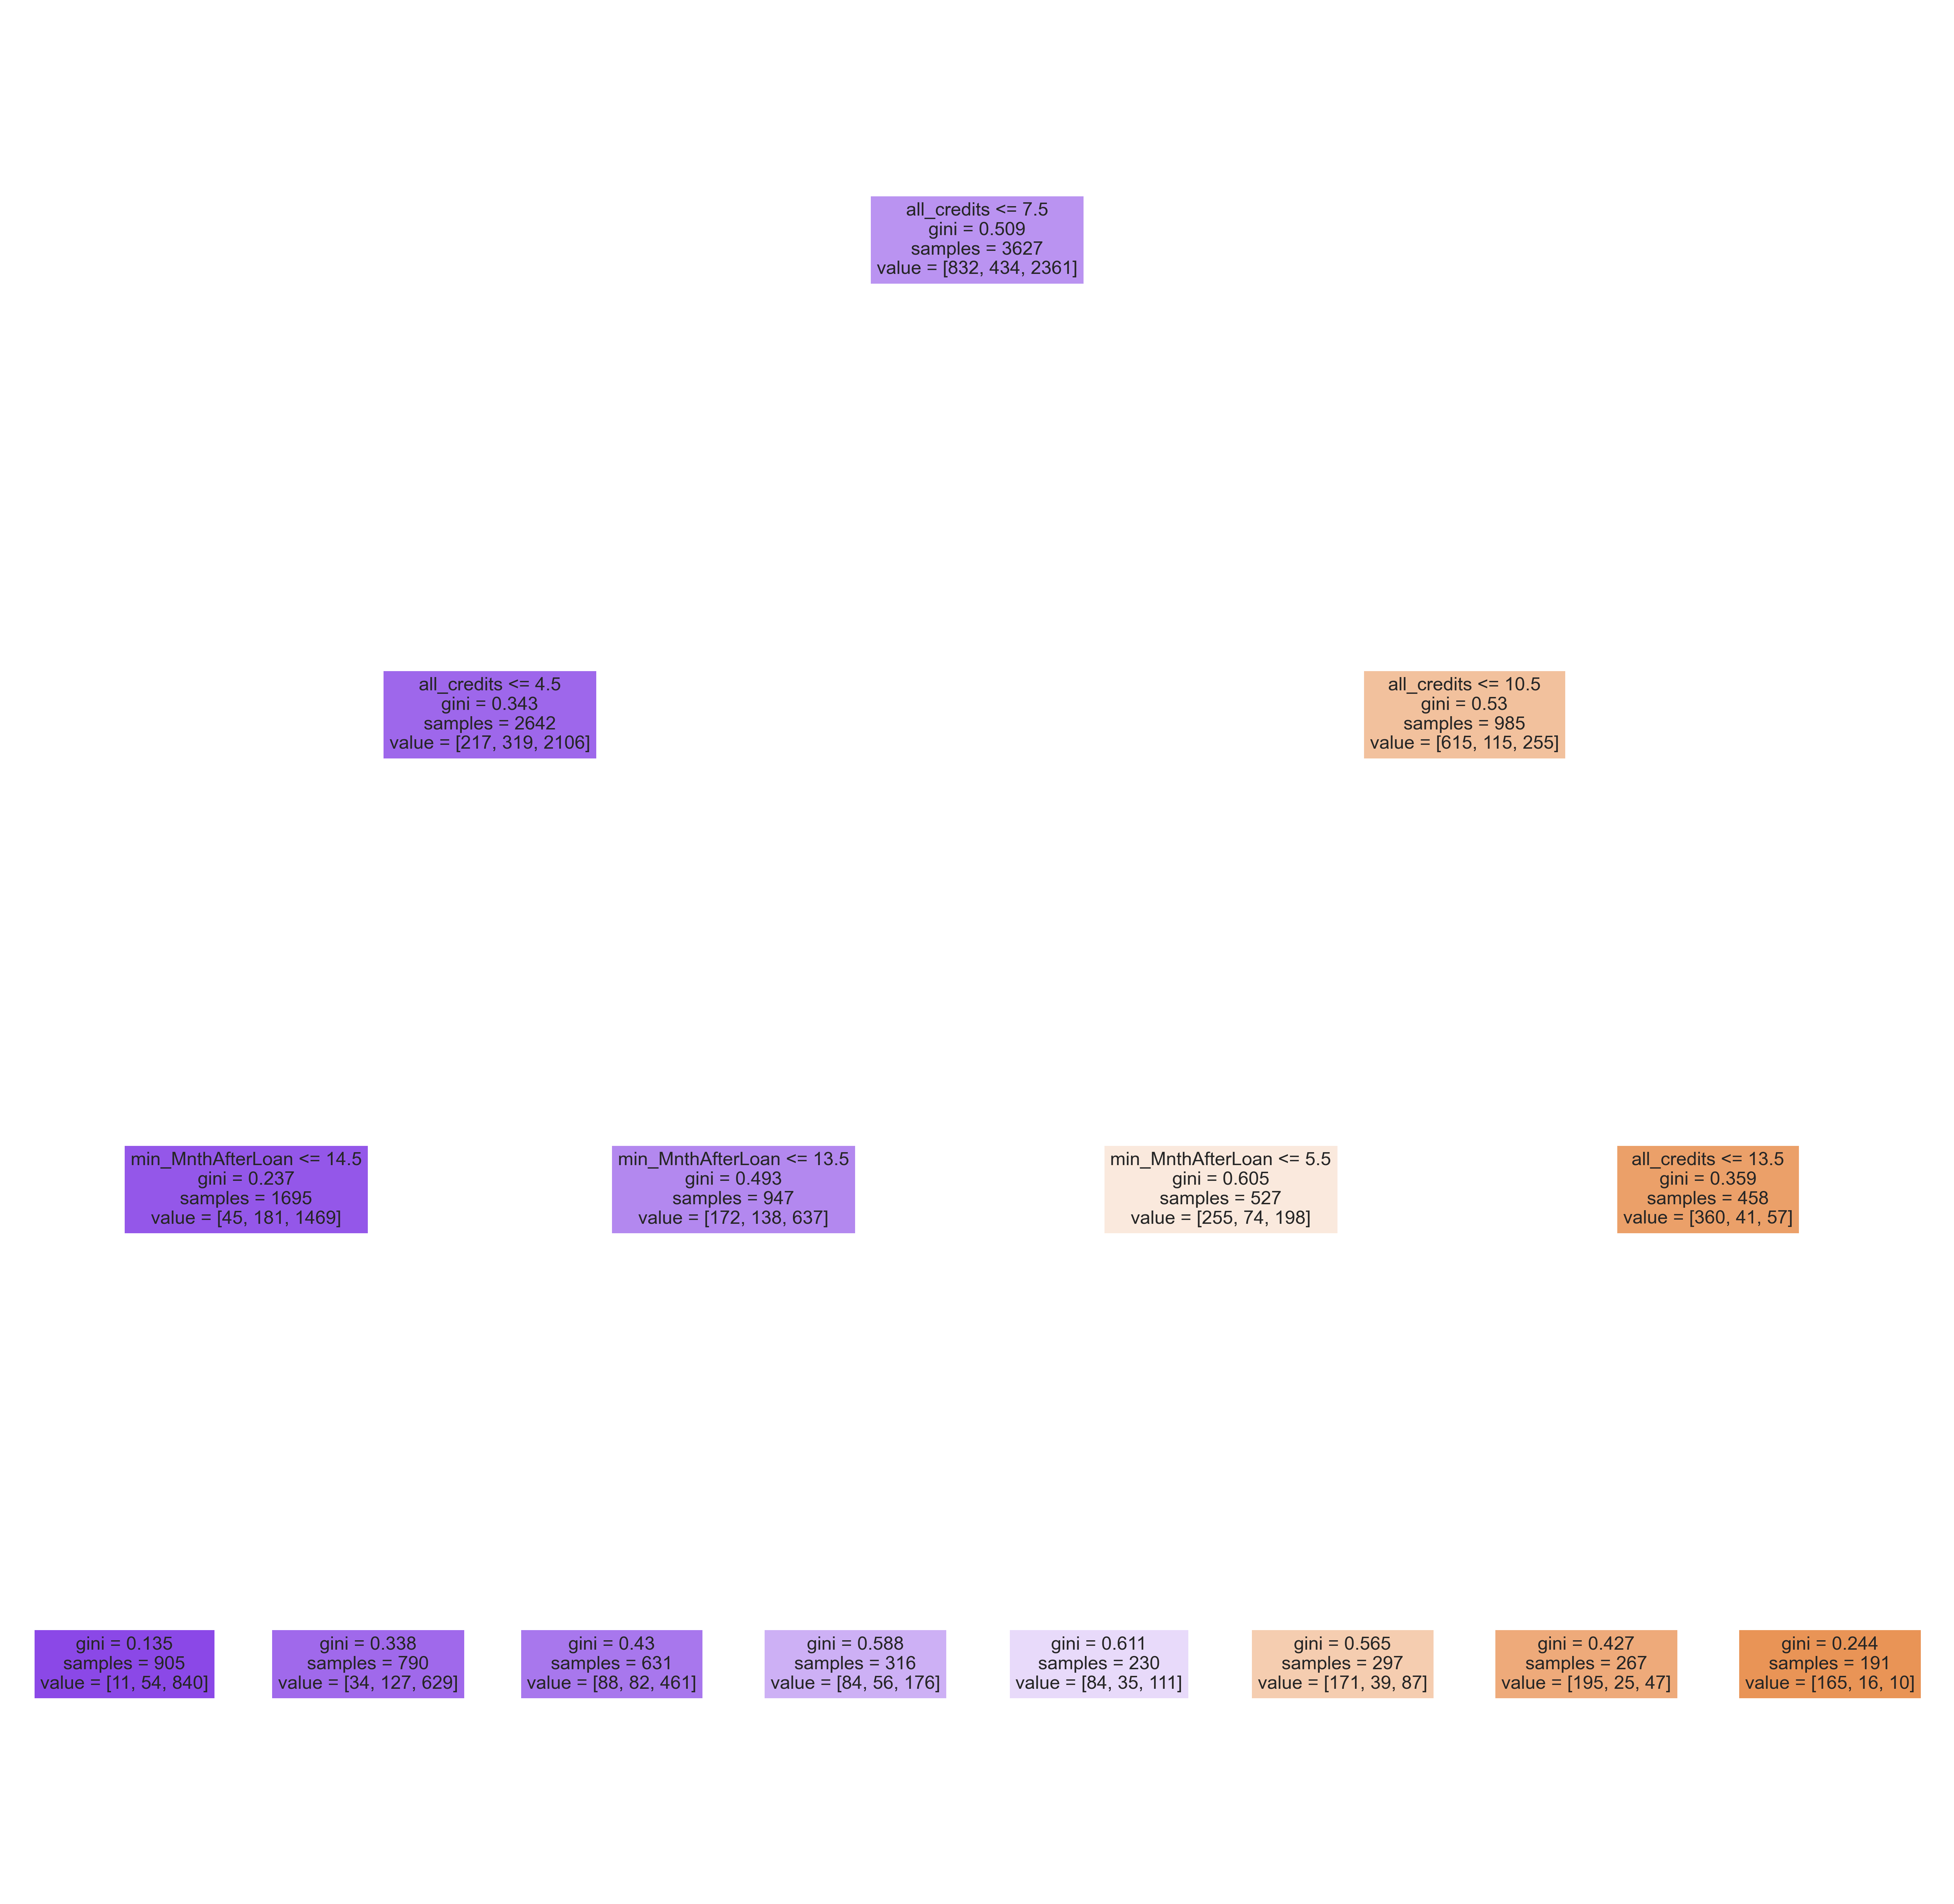

In [81]:
from sklearn import tree
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf, filled = True, 
                   feature_names = X_train.columns.values, )

### Above we get groups from which we can draw conclusions about the ratio of how recently the last loan was issued in relation to the total number of loans.
#### Based on this, it is possible to draw conclusions on the approval of loans to the client by the bank / or other banks, because if the total number of loans is more than 14 or the number of months passed since the approval of the loan is large (more than 14 months), then you should carefully check the information on this client before deciding on a loan.

## RFM Clustering
### ---------------------------------------
### recency = min_MnthAfterLoan
### frequency = all_credits
### monetary = sum_of_paym_months

In [82]:
quantiles = dbc_ohe.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()
segmented_rfm = dbc_ohe

def RScore(x,p,d):
     if x <= d[p][0.20]:
         return 1
     elif x <= d[p][0.40]:
         return 2
     elif x <= d[p][0.60]: 
         return 3
     elif x<=d[p][0.80]:
         return 4
     else:
         return 5

segmented_rfm['r_quartile'] = segmented_rfm['min_MnthAfterLoan'].apply(RScore, args=('min_MnthAfterLoan',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['all_credits'].apply(RScore, args=('all_credits',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['sum_of_paym_months'].apply(RScore, args=('sum_of_paym_months',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()


,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,FAMILY_STATUS_гражданский_брак,FAMILY_STATUS_женат_/_замужем,FAMILY_STATUS_повторный_брак,FAMILY_STATUS_разведен_/_разведена,FAMILY_STATUS_холост_/_не_замужем,cluster_names,r_quartile,f_quartile,m_quartile,RFMScore
1,1000032,1.00,0.55,0,0,3.00,29.00,52.00,1.00,0.00,...,0,1,0,0,0,2,2,4,4,244
4,1000092,0.00,0.31,2,0,1.00,106.00,34.00,3.00,3.00,...,0,1,0,0,0,0,4,3,5,435
5,1000112,0.00,0.22,1,0,0.00,69.00,30.00,1.00,1.00,...,0,1,0,0,0,0,4,5,5,455
8,1000172,0.00,0.42,0,0,0.00,11.00,47.00,3.00,2.00,...,0,1,0,0,0,0,3,5,5,355
10,1000212,0.00,0.25,0,0,0.00,91.00,34.00,0.00,0.00,...,0,1,0,0,0,1,5,1,4,514


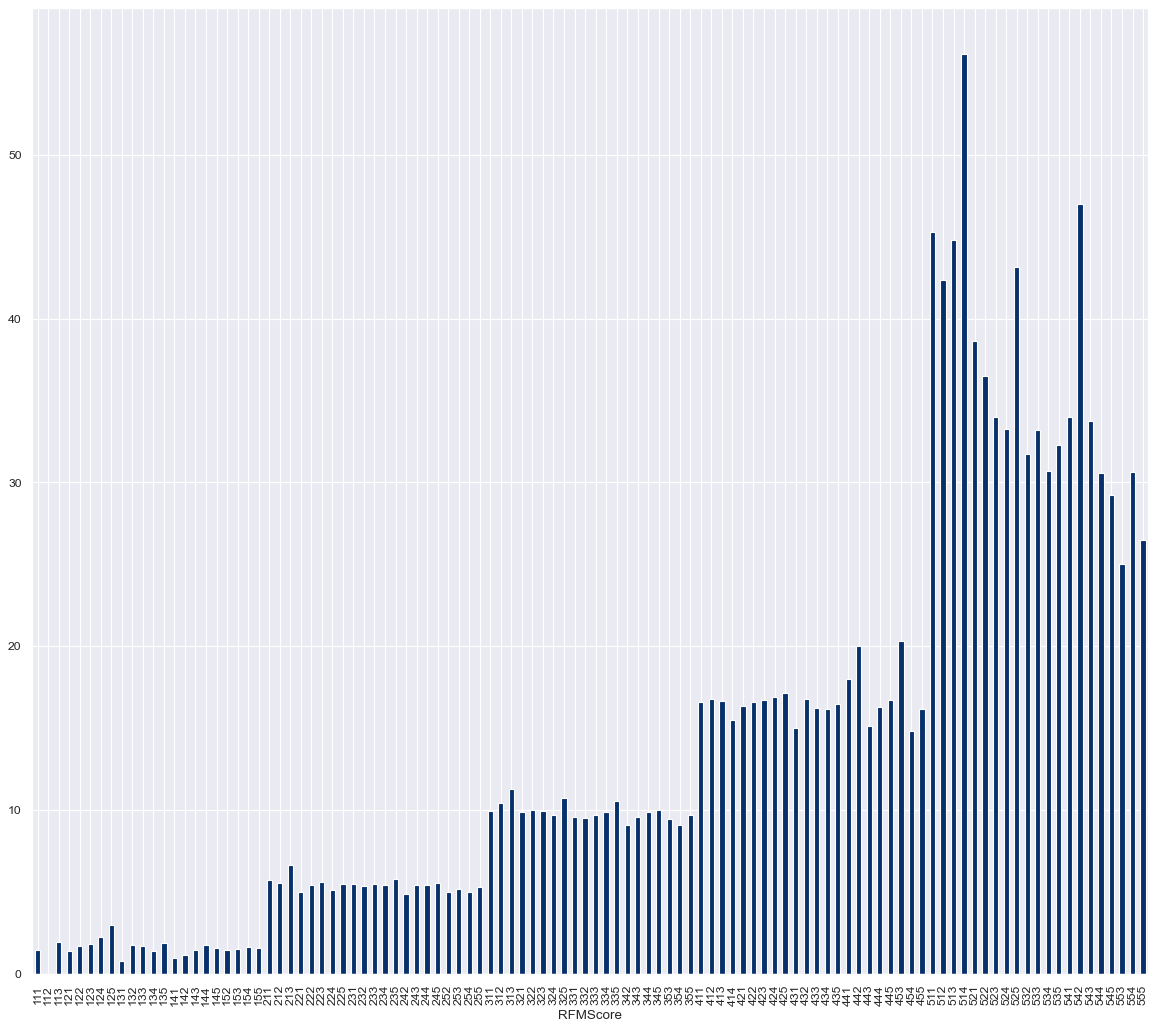

In [83]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('min_MnthAfterLoan').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

In [84]:
rfm_data_mode = dbc_ohe.groupby('RFMScore').agg(pd.Series.mode)
rfm_data_mode = rfm_data_mode.T
rfm_data_mode

<ipython-input-84-dcde8b06a9f8>:1: FutureWarning: ['ID'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  rfm_data_mode = dbc_ohe.groupby('RFMScore').agg(pd.Series.mode)


RFMScore,111,112,113,121,122,123,124,125,131,132,...,534,535,541,542,543,544,545,553,554,555
INSURANCE_FLAG,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,...,"[0.0, 1.0]",0.00,1.00,"[0.0, 1.0]",1.00,1.00,1.00,1.00,1.00,1.00
DTI,0.49,"[0.4, 0.51]","[0.18, 0.32, 0.59]",0.59,0.49,0.49,0.38,0.36,0.59,0.59,...,"[0.27, 0.53]","[0.4, 0.44]",0.24,"[0.17, 0.25]","[0.22, 0.24, 0.4, 0.58]",0.48,"[0.21, 0.48, 0.55]",0.35,"[0.19, 0.22, 0.33]","[0.22, 0.49]"
FULL_AGE_CHILD_NUMBER,0,0,0,0,0,0,"[0, 1]",0,0,0,...,0,0,0,"[0, 2]","[0, 1]",0,0,0,"[0, 1, 2]",0
DEPENDANT_NUMBER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BANKACCOUNT_FLAG,0.00,"[0.0, 1.0]",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,"[0.0, 3.0]","[0.0, 1.0]",0.00,0.00,0.00,0.00,0.00
Period_at_work,6.00,"[8.0, 33.0]","[8.0, 82.0, 88.0]","[15.0, 19.0]",37.00,"[6.0, 7.0]","[6.0, 12.0, 14.0, 22.0, 24.0, 27.0, 79.0, 85.0...",6.00,"[7.0, 10.0, 13.0, 14.0, 15.0, 16.0, 35.0, 65.0...",50.00,...,"[33.0, 34.0, 39.0]",6.00,7.00,"[35.0, 94.0]","[6.0, 9.0, 11.0, 60.0]","[11.0, 114.0]","[47.0, 76.0]",10.00,"[19.0, 58.0, 119.0]","[12.0, 13.0, 17.0, 24.0, 29.0, 32.0, 35.0, 43...."
age,25.00,"[25.0, 43.0]","[29.0, 37.0, 44.0]",30.00,27.00,25.00,"[26.0, 32.0, 33.0, 34.0, 35.0, 39.0, 40.0, 41....",28.00,37.00,25.00,...,"[34.0, 40.0, 45.0]","[32.0, 51.0]",54.00,"[29.0, 34.0]",26.00,31.00,39.00,28.00,"[28.0, 30.0, 36.0]","[29.0, 33.0, 40.0, 54.0]"
max90days,2.00,"[1.0, 3.0]","[0.0, 1.0, 4.0]",2.00,2.00,1.00,1.00,1.00,2.00,2.00,...,0.00,1.00,0.00,0.00,0.00,1.00,2.00,1.00,"[0.0, 1.0, 3.0]",2.00
max60days,0.00,"[1.0, 3.0]","[0.0, 1.0, 4.0]",0.00,1.00,"[0.0, 1.0, 2.0]",0.00,0.00,1.00,0.00,...,0.00,"[0.0, 1.0]",0.00,0.00,0.00,0.00,0.00,0.00,"[0.0, 1.0, 2.0]",1.00
max30days,0.00,"[1.0, 2.0]","[0.0, 1.0, 2.0]",0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"[0.0, 1.0, 2.0]",0.00


In [85]:
rfm_data_mean = dbc_ohe.groupby('RFMScore').mean()
rfm_data_mean = rfm_data_mean.T
rfm_data_mean

RFMScore,111,112,113,121,122,123,124,125,131,132,...,534,535,541,542,543,544,545,553,554,555
ID,1094166.74,1065002.00,1050265.33,1101005.24,1110361.64,1105148.25,1082696.00,1096672.00,1073604.00,1105257.17,...,1095810.42,1068389.89,1133452.00,1109352.00,1098627.00,1106988.84,1092974.61,1107532.00,1142818.67,1091213.43
INSURANCE_FLAG,0.68,0.00,0.67,0.73,0.52,0.62,0.70,0.00,0.60,0.64,...,0.50,0.42,1.00,0.50,1.00,0.68,0.57,1.00,0.67,0.64
DTI,0.38,0.46,0.36,0.41,0.41,0.38,0.32,0.36,0.41,0.40,...,0.37,0.37,0.24,0.21,0.36,0.40,0.38,0.35,0.25,0.39
FULL_AGE_CHILD_NUMBER,0.47,0.00,0.00,0.45,0.43,0.69,0.80,0.00,0.30,0.48,...,0.74,0.53,0.00,1.00,0.50,0.42,0.83,0.00,1.00,0.93
DEPENDANT_NUMBER,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.05,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00
BANKACCOUNT_FLAG,0.43,0.50,0.00,0.49,0.59,0.25,0.10,0.00,0.20,0.59,...,0.39,0.21,0.00,1.50,0.50,0.42,0.13,0.00,0.00,0.21
Period_at_work,31.89,20.50,59.33,42.23,40.48,43.81,54.50,6.00,36.70,48.93,...,66.74,68.58,7.00,64.50,21.50,56.47,79.48,10.00,65.33,79.71
age,31.67,34.00,36.67,33.08,33.05,35.31,38.10,28.00,35.80,33.40,...,38.42,39.74,54.00,31.50,29.50,39.16,38.04,28.00,31.33,41.00
max90days,2.16,2.00,1.67,2.53,2.43,2.25,0.70,1.00,2.70,2.45,...,1.08,1.42,0.00,0.00,1.00,0.84,1.39,1.00,1.33,2.79
max60days,1.75,2.00,1.67,1.73,1.64,1.50,0.50,0.00,1.60,1.67,...,0.82,1.00,0.00,0.00,0.75,0.53,1.09,0.00,1.00,2.00


In [86]:
rfm_data_mode['155']

INSURANCE_FLAG                                                     1.00
DTI                                                        [0.49, 0.59]
FULL_AGE_CHILD_NUMBER                                                 0
DEPENDANT_NUMBER                                                      0
BANKACCOUNT_FLAG                                                   0.00
Period_at_work                                                    30.00
age                                                               41.00
max90days                                                          2.00
max60days                                                          1.00
max30days                                                          0.00
max21days                                                          0.00
max14days                                                          0.00
avg_num_delay                                                      0.00
if_zalog                                                        

In [87]:
rfm_data_mean['155']

ID                                                        1112176.00
INSURANCE_FLAG                                                  0.59
DTI                                                             0.45
FULL_AGE_CHILD_NUMBER                                           0.77
DEPENDANT_NUMBER                                                0.00
BANKACCOUNT_FLAG                                                0.29
Period_at_work                                                 68.42
age                                                            38.31
max90days                                                       3.08
max60days                                                       1.99
max30days                                                       1.26
max21days                                                       0.81
max14days                                                       0.63
avg_num_delay                                                   0.05
if_zalog                          

In [88]:
rfm_data_mode['555']

INSURANCE_FLAG                                                                                          1.00
DTI                                                                                             [0.22, 0.49]
FULL_AGE_CHILD_NUMBER                                                                                      0
DEPENDANT_NUMBER                                                                                           0
BANKACCOUNT_FLAG                                                                                        0.00
Period_at_work                                             [12.0, 13.0, 17.0, 24.0, 29.0, 32.0, 35.0, 43....
age                                                                                 [29.0, 33.0, 40.0, 54.0]
max90days                                                                                               2.00
max60days                                                                                               1.00
max30days          

In [89]:
rfm_data_mean['555']

ID                                                        1091213.43
INSURANCE_FLAG                                                  0.64
DTI                                                             0.39
FULL_AGE_CHILD_NUMBER                                           0.93
DEPENDANT_NUMBER                                                0.00
BANKACCOUNT_FLAG                                                0.21
Period_at_work                                                 79.71
age                                                            41.00
max90days                                                       2.79
max60days                                                       2.00
max30days                                                       1.57
max21days                                                       1.50
max14days                                                       1.36
avg_num_delay                                                   0.08
if_zalog                          

In [90]:
rfm_data_mode['511']

INSURANCE_FLAG                                                     1.00
DTI                                                        [0.25, 0.26]
FULL_AGE_CHILD_NUMBER                                                 0
DEPENDANT_NUMBER                                                      0
BANKACCOUNT_FLAG                                                   0.00
Period_at_work                                                    13.00
age                                                        [26.0, 29.0]
max90days                                                          1.00
max60days                                                          0.00
max30days                                                          0.00
max21days                                                          0.00
max14days                                                          0.00
avg_num_delay                                                      0.00
if_zalog                                                        

In [91]:
rfm_data_mean['511']

ID                                                        1096878.83
INSURANCE_FLAG                                                  0.60
DTI                                                             0.32
FULL_AGE_CHILD_NUMBER                                           0.58
DEPENDANT_NUMBER                                                0.02
BANKACCOUNT_FLAG                                                0.37
Period_at_work                                                 54.30
age                                                            35.93
max90days                                                       0.89
max60days                                                       0.80
max30days                                                       0.73
max21days                                                       0.62
max14days                                                       0.57
avg_num_delay                                                   0.07
if_zalog                          

In [92]:
rfm_data_mode['111']

INSURANCE_FLAG                                             1.00
DTI                                                        0.49
FULL_AGE_CHILD_NUMBER                                         0
DEPENDANT_NUMBER                                              0
BANKACCOUNT_FLAG                                           0.00
Period_at_work                                             6.00
age                                                       25.00
max90days                                                  2.00
max60days                                                  0.00
max30days                                                  0.00
max21days                                                  0.00
max14days                                                  0.00
avg_num_delay                                              0.00
if_zalog                                                   0.00
num_AccountActive180                                       1.00
num_AccountActive90                     

In [93]:
rfm_data_mean['111']

ID                                                        1094166.74
INSURANCE_FLAG                                                  0.68
DTI                                                             0.38
FULL_AGE_CHILD_NUMBER                                           0.47
DEPENDANT_NUMBER                                                0.00
BANKACCOUNT_FLAG                                                0.43
Period_at_work                                                 31.89
age                                                            31.67
max90days                                                       2.16
max60days                                                       1.75
max30days                                                       1.25
max21days                                                       1.04
max14days                                                       0.87
avg_num_delay                                                   0.04
if_zalog                          

## Conclusions on this segmentation:
### We see that from this segmentation it follows that we have 4 key clusters:  
### -------------------------------------------------------------------------------------
## №1
### R=1, F=5, M=5 — they pay often, a lot and recently. The most loyal and active users.
### Portrait:
#### - Woman
#### - 38 years old
#### - Married
#### - Many credits, the last recently
#### - Repair
#### - Salary more than 250k
### -------------------------------------------------------------------------------------
## №2
### R=4/5, F=4/5, M=4/5 — loyal users on the verge of leaving. We offer them a bonus, a discount and try to return them.
### Portrait:
#### - Male
#### - 41 years old
#### - Married / Widower
#### - A lot of credits, the last one for a long time
#### - Salary and amount of payments over 200k
### -------------------------------------------------------------------------------------
## №3
### R=5, F=1, M=1 — they pay little, rarely and for a long time. Most likely lost customers who should not be returned if the price of attraction is higher than the expected profit.
### Portrait:
#### - Male
#### - 36 year old
#### - Married 
#### - Few credits, the last one for a long time
#### - The amount of payments less than 20k
### -------------------------------------------------------------------------------------
## №4
### R=1/2, F=1, M=1/2/3/4/5 — users have recently made their first payment. They should be more encouraged to buy more by offering attractive conditions and bonuses.
### Portrait:
#### - Woman
#### - 32 years old
#### - Married
#### - Few credits, last recently
#### - Repair
#### - The amount of payments is small, but they were made recently

# -------------------------------------------------------------------------------------

## RFM conclusions:
### - The split occurred in slightly similar classes, due to the predominance of data of the same kind in the table, although some different characteristics were revealed.
##     
## General conclusions:
### Clusters turned out to be similar to k-means clustering, but some characteristics were more evident (for example, information on payments) and differed depending on the type of segmentation.
### It was possible to identify several segments in some detail using clustering algorithms and get recommendations for interacting with each of them using RFM and Decision tree segmentation. 